In [1]:
# titles = ['Q_','PLOTS_', 'STAT_TEST_', 'ANS_']

# for j in titles:
#     for i in range(1,6):
#         print(f'[< {j}{i} >](#{j}{i})')

In [2]:
# for j in titles:
#     for i in range(1,6):
#         print(f'''<a id="{j}{i}"> </a>
# <div class="alert alert-block alert-info">
# </div>

# ***''')

<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***
# Exercises
Sourcing the Zillow database as the data source, create a jupyter notebook named `explore_zillow` and do the following:

1. [< Q_1 >](#Q_1)
  - [< PLOTS_1 >](#PLOTS_1)
  - [< STAT_TEST_1 >](#STAT_TEST_1)
  - [< ANS_1 >](#ANS_1)
2. [< Q_2 >](#Q_2)
  - [< PLOTS_2 >](#PLOTS_2)
  - [< STAT_TEST_2 >](#STAT_TEST_2)
  - [< ANS_2 >](#ANS_2)
3. [< Q_3 >](#Q_3)
  - [< PLOTS_3 >](#PLOTS_3)
  - [< STAT_TEST_3 >](#STAT_TEST_3)
  - [< ANS_3 >](#ANS_3)
4. [< Q_4 >](#Q_4)
  - [< PLOTS_4 >](#PLOTS_4)
  - [< STAT_TEST_4 >](#STAT_TEST_4)
  - [< ANS_4 >](#ANS_4)
5. [< Q_5 >](#Q_5)
  - [< PLOTS_5 >](#PLOTS_5)
  - [< STAT_TEST_5 >](#STAT_TEST_5)
  - [< ANS_5 >](#ANS_5)

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

from wrangle import boxplots, hists
from wrangle import strike, bold, underline
from wrangle import get_zillow, SFR, remove_outliers, handle_missing_values

from wrangle import summarize, column_value_counts

from wrangle import split_data_continuous

In [4]:
df = get_zillow()

In [5]:
summarize(df)


    DataFrame .head():
    -----------------
|    |   id |   parcel |    logerror | trans_date          | ac_type   | arch_type   | build_type   | heat_type   | land_use_type             | story_type   | construction_type   |   basementsqft |   bathrooms |   bedrooms |   quality_type |   calc_bath_n_bed |   deck_type |   floor_1_sqft |   tot_sqft |   sqft_12 |   sqft_13 |   sqft_15 |   sqft_50 |   sqft_6 | fips               |   fireplaces |   full_baths |   garages |   garage_sqft |   hot_tub |         lat |          lon |   lot_sqft |   pools |   pool_sqft |   pool_id10 |   pool_id2 |   pool_id7 | county_landuse   | zoning     |   raw_tract_and_block |   city_id |   county_id |   neighborhood |   zip_code |   num_rooms |   stories_type |   three_quarter_baths |   units |   yard_sqft_17 |   yard_sqft_26 |   year_built |   num_stories |   fireplace_flag |   building_tax_value |        tax_value |   year_assesed |   land_tax_value |   tax_amount | tax_delinquency_flag   |   tax_delinquency_year |   tract_and_block |
|---:|-----:|---------:|------------:|:--------------------|:----------|:------------|:-------------|:------------|:--------------------------|:-------------|:--------------------|---------------:|------------:|-----------:|---------------:|------------------:|------------:|---------------:|-----------:|----------:|----------:|----------:|----------:|---------:|:-------------------|-------------:|-------------:|----------:|--------------:|----------:|------------:|-------------:|-----------:|--------:|------------:|------------:|-----------:|-----------:|:-----------------|:-----------|----------------------:|----------:|------------:|---------------:|-----------:|------------:|---------------:|----------------------:|--------:|---------------:|---------------:|-------------:|--------------:|-----------------:|---------------------:|-----------------:|---------------:|-----------------:|-------------:|:-----------------------|-----------------------:|------------------:|
|  0 |    0 | 14297519 |  0.0255949  | 2017-01-01 00:00:00 |           |             |              |             | Single Family Residential |              |                     |            nan |         3.5 |          4 |            nan |               3.5 |         nan |            nan |       3100 |      3100 |       nan |       nan |       nan |      nan | Orange County      |          nan |            3 |         2 |           633 |       nan | 3.36349e+07 | -1.17869e+08 |       4506 |     nan |         nan |         nan |        nan |        nan | 122              |            |           6.05906e+07 |     53571 |        1286 |            nan |      96978 |           0 |            nan |                     1 |     nan |            nan |            nan |         1998 |           nan |              nan |               485713 |      1.02328e+06 |           2016 |           537569 |     11013.7  |                        |                    nan |       6.05906e+13 |
|  1 |    1 | 17052889 |  0.0556191  | 2017-01-01 00:00:00 |           |             |              |             | Single Family Residential |              |                     |            nan |         1   |          2 |            nan |               1   |         nan |           1465 |       1465 |      1465 |       nan |       nan |      1465 |      nan | Ventura County     |            1 |            1 |         1 |             0 |       nan | 3.44493e+07 | -1.19282e+08 |      12647 |     nan |         nan |         nan |        nan |        nan | 1110             |            |           6.111e+07   |     13091 |        2061 |            nan |      97099 |           5 |            nan |                   nan |     nan |            nan |            nan |         1967 |             1 |              nan |                88000 | 464000           |           2016 |           376000 |      5672.48 |                        |                    nan |       6.111e+13   |
|  2 |    2 | 14186244 |  0.00538285 | 2017-01-01 00:00:00 |           |             |              |             | Single Family Residential |              |                     |            nan |         2   |          3 |            nan |               2   |         nan |            nan |       1243 |      1243 |       nan |       nan |       nan |      nan | Orange County      |          nan |            2 |         2 |           440 |       nan | 3.38862e+07 | -1.17823e+08 |       8432 |       1 |         nan |         nan |        nan |          1 | 122              |            |           6.05902e+07 |     21412 |        1286 |            nan |      97078 |           6 |            nan |                   nan |     nan |            nan |            nan |         1962 |             1 |              nan |                85289 | 564778           |           2016 |           479489 |      6488.3  |                        |                    nan |       6.05902e+13 |
|  3 |    3 | 12177905 | -0.10341    | 2017-01-01 00:00:00 |           |             |              | Central     | Single Family Residential |              |                     |            nan |         3   |          4 |              8 |               3   |         nan |            nan |       2376 |      2376 |       nan |       nan |       nan |      nan | Los Angeles County |          nan |            3 |       nan |           nan |       nan | 3.42452e+07 | -1.18241e+08 |      13038 |       1 |         nan |         nan |        nan |          1 | 0101             | LCR110000* |           6.0373e+07  |    396551 |        3101 |            nan |      96330 |           0 |            nan |                   nan |       1 |            nan |            nan |         1970 |           nan |              nan |               108918 | 145143           |           2016 |            36225 |      1777.51 |                        |                    nan |       6.0373e+13  |
|  4 |    4 | 10887214 |  0.00694036 | 2017-01-01 00:00:00 | Central   |             |              | Central     | Condominium               |              |                     |            nan |         3   |          3 |              8 |               3   |         nan |            nan |       1312 |      1312 |       nan |       nan |       nan |      nan | Los Angeles County |          nan |            3 |       nan |           nan |       nan | 3.41851e+07 | -1.18415e+08 |     278581 |       1 |         nan |         nan |        nan |          1 | 010C             | LAR3       |           6.03712e+07 |     12447 |        3101 |         268548 |      96451 |           0 |            nan |                   nan |       1 |            nan |            nan |         1964 |           nan |              nan |                73681 | 119407           |           2016 |            45726 |      1533.89 |                        |                    nan |       6.03712e+13 |
    
    DataFrame .info():
    -----------------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76521 entries, 0 to 76711
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    76521 non-null  int64         
 1   parcel                76521 non-null  int64         
 2   logerror              76521 non-null  float64       
 3   trans_date            76521 non-null  datetime64[ns]
 4   ac_type               24783 non-null  object        
 5   arch_type             206 non-null    object        
 6   build_type            0 non-null      object        
 7   heat_type             49185 non-null  object        
 8   land_use_type         76521 non-null  object        
 9   story_type            50 non-null     object        
 10  construction_type     222 non-null    object        
 11  basementsqft          50 non-null     float64       
 12  bathrooms             76521 non-null  float64       
 13  bedrooms        


    
    DataFrame .describe():
    -----------------
|                      |   count |             mean |              std |             min |              25% |              50% |              75% |              max |
|:---------------------|--------:|-----------------:|-----------------:|----------------:|-----------------:|-----------------:|-----------------:|-----------------:|
| id                   |   76521 |  38851.4         |  22404.5         |     0           |  19465           |  38894           |  58255           |  77612           |
| parcel               |   76521 |      1.29929e+07 |      3.31108e+06 |     1.07119e+07 |      1.15321e+07 |      1.25273e+07 |      1.42094e+07 |      1.67689e+08 |
| logerror             |   76521 |      0.016456    |      0.168209    |    -4.65542     |     -0.0242734   |      0.0066161   |      0.0390554   |      5.263       |
| basementsqft         |      50 |    679.72        |    689.704       |    38           |    273           |    515           |    796.5         |   3560           |
| bathrooms            |   76521 |      2.32044     |      0.978789    |     1           |      2           |      2           |      3           |     18           |
| bedrooms             |   76521 |      3.08681     |      1.09967     |     1           |      2           |      3           |      4           |     16           |
| quality_type         |   49422 |      6.53428     |      1.7211      |     1           |      6           |      6           |      8           |     12           |
| calc_bath_n_bed      |   76505 |      2.32044     |      0.978795    |     1           |      2           |      2           |      3           |     18           |
| deck_type            |     612 |     66           |      0           |    66           |     66           |     66           |     66           |     66           |
| floor_1_sqft         |    6006 |   1364.5         |    668.634       |    44           |    954.25        |   1256           |   1614.75        |   6912           |
| tot_sqft             |   76521 |   1784.13        |    940.759       |   152           |   1184           |   1543           |   2109           |  21929           |
| sqft_12              |   73390 |   1763.08        |    932.694       |   152           |   1175           |   1525           |   2077           |  21929           |
| sqft_13              |      26 |   1375.38        |    128.218       |  1056           |   1344           |   1440           |   1440           |   1560           |
| sqft_15              |    2927 |   2347.84        |    968.766       |   598           |   1629.5         |   2100           |   2839.5         |   7990           |
| sqft_50              |    6006 |   1379.8         |    724.192       |    44           |    956           |   1259           |   1618.75        |  12467           |
| sqft_6               |     178 |   1250.69        |    809.124       |   380           |    790.75        |    982.5         |   1318.25        |   5598           |
| fireplaces           |    8247 |      1.18989     |      0.489105    |     1           |      1           |      1           |      1           |      5           |
| full_baths           |   76505 |      2.25384     |      0.965785    |     1           |      2           |      2           |      3           |     18           |
| garages              |   25287 |      1.82667     |      0.572833    |     0           |      2           |      2           |      2           |     14           |
| garage_sqft          |   25287 |    352.331       |    260.98        |     0           |      0           |    437           |    493           |   4251           |
| hot_tub              |    1538 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| lat                  |   76521 |      3.40092e+07 | 265422           |     3.33395e+07 |      3.38157e+07 |      3.40225e+07 |      3.4175e+07  |      3.48188e+07 |
| lon                  |   76521 |     -1.18203e+08 | 358549           |    -1.19475e+08 |     -1.18416e+08 |     -1.1818e+08  |     -1.17929e+08 |     -1.17555e+08 |
| lot_sqft             |   68390 |  29820.3         | 123294           |   236           |   5700           |   7201           |  11744.5         |      6.97101e+06 |
| pools                |   16048 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| pool_sqft            |     862 |    518.092       |    156.166       |    24           |    424           |    500           |    600           |   1500           |
| pool_id10            |     464 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| pool_id2             |    1074 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| pool_id7             |   14953 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| raw_tract_and_block  |   76521 |      6.04905e+07 | 205236           |     6.0371e+07  |      6.03731e+07 |      6.0376e+07  |      6.05904e+07 |      6.11101e+07 |
| city_id              |   75075 |  33674           |  47227.3         |  3491           |  12447           |  25218           |  45457           | 396556           |
| county_id            |   76521 |   2537.03        |    800.745       |  1286           |   1286           |   3101           |   3101           |   3101           |
| neighborhood         |   30526 | 187034           | 165175           |  6952           |  41466           | 118825           | 274765           | 764167           |
| zip_code             |   76477 |  96587           |   3819.19        | 95982           |  96193           |  96389           |  96986           | 399675           |
| num_rooms            |   76521 |      1.49141     |      2.83431     |     0           |      0           |      0           |      0           |     15           |
| stories_type         |      50 |      7           |      0           |     7           |      7           |      7           |      7           |      7           |
| three_quarter_baths  |   10094 |      1.00961     |      0.118642    |     1           |      1           |      1           |      1           |      7           |
| units                |   49985 |      1.09327     |      0.421759    |     1           |      1           |      1           |      1           |      6           |
| yard_sqft_17         |    2377 |    305.218       |    238.711       |    11           |    170           |    250           |    364           |   3191           |
| yard_sqft_26         |      70 |    216.386       |    190.178       |    12           |     61.5         |    164.5         |    310.5         |    868           |
| num_stories          |   17336 |      1.42957     |      0.544421    |     1           |      1           |      1           |      2           |      6           |
| fireplace_flag       |     172 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| building_tax_value   |   76437 | 188788           | 223511           |    44           |  84476           | 136734           | 218767           |      9.1649e+06  |
| tax_value            |   76521 | 488694           | 647844           |  1000           | 207172           | 359000           | 568540           |      4.90612e+07 |
| year_assesed         |   76521 |   2016           |      0           |  2016           |   2016           |   2016           |   2016           |   2016           |
| land_tax_value       |   76521 | 300114           | 490350           |   161           |  85504           | 203559           | 366162           |      4.89522e+07 |
| tax_amount           |   76516 |   5979.33        |   7554.89        |    19.92        |   2720.42        |   4451.27        |   6922           | 586639           |
| tax_delinquency_year |    2852 |     14.087       |      2.19198     |     3           |     14           |     15           |     15           |     99           |
| tract_and_block      |   76301 |      6.0496e+13  |      1.54339e+12 |     6.0371e+13  |      6.03731e+13 |      6.0376e+13  |      6.05904e+13 |      4.8303e+14  |
    
    Null Value Assessments:
    -----------------
        
        Nulls By Column:
|                      |   num_rows_missing |   percent_missing |
|:---------------------|-------------------:|------------------:|
| ac_type              |              51738 |       67.6128     |
| arch_type            |              76315 |       99.7308     |
| build_type           |              76521 |      100          |
| heat_type            |              27336 |       35.7235     |
| story_type           |              76471 |       99.9347     |
| construction_type    |              76299 |       99.7099     |
| basementsqft         |              76471 |       99.9347     |
| quality_type         |              27099 |       35.4138     |
| calc_bath_n_bed      |                 16 |        0.0209093  |
| deck_type            |              75909 |       99.2002     |
| floor_1_sqft         |              70515 |       92.1512     |
| sqft_12              |               3131 |        4.09169    |
| sqft_13              |              76495 |       99.966      |
| sqft_15              |              73594 |       96.1749     |
| sqft_50              |              70515 |       92.1512     |
| sqft_6               |              76343 |       99.7674     |
| fireplaces           |              68274 |       89.2226     |
| full_baths           |                 16 |        0.0209093  |
| garages              |              51234 |       66.9542     |
| garage_sqft          |              51234 |       66.9542     |
| hot_tub              |              74983 |       97.9901     |
| lot_sqft             |               8131 |       10.6258     |
| pools                |              60473 |       79.028      |
| pool_sqft            |              75659 |       98.8735     |
| pool_id10            |              76057 |       99.3936     |
| pool_id2             |              75447 |       98.5965     |
| pool_id7             |              61568 |       80.459      |
| zoning               |              26604 |       34.7669     |
| city_id              |               1446 |        1.88968    |
| neighborhood         |              45995 |       60.1077     |
| zip_code             |                 44 |        0.0575006  |
| stories_type         |              76471 |       99.9347     |
| three_quarter_baths  |              66427 |       86.8088     |
| units                |              26536 |       34.6781     |
| yard_sqft_17         |              74144 |       96.8937     |
| yard_sqft_26         |              76451 |       99.9085     |
| year_built           |                 57 |        0.0744894  |
| num_stories          |              59185 |       77.3448     |
| fireplace_flag       |              76349 |       99.7752     |
| building_tax_value   |                 84 |        0.109774   |
| tax_amount           |                  5 |        0.00653415 |
| tax_delinquency_flag |              73669 |       96.2729     |
| tax_delinquency_year |              73669 |       96.2729     |
| tract_and_block      |                220 |        0.287503   |
    -----------------
        
        Nulls By Row:
|    |   num_cols_missing |   percent_missing |   count |
|---:|-------------------:|------------------:|--------:|
|  0 |                 19 |           30.6452 |       2 |
|  1 |                 20 |           32.2581 |       3 |
|  2 |                 21 |           33.871  |      13 |
|  3 |                 22 |           35.4839 |      79 |
|  4 |                 23 |           37.0968 |     265 |
|  5 |                 24 |           38.7097 |     606 |
|  6 |                 25 |           40.3226 |     656 |
|  7 |                 26 |           41.9355 |    5740 |
|  8 |                 27 |           43.5484 |    7939 |
|  9 |                 28 |           45.1613 |   12352 |
| 10 |                 29 |           46.7742 |   20596 |
| 11 |                 30 |           48.3871 |   16035 |
| 12 |                 31 |           50      |    6314 |
| 13 |                 32 |           51.6129 |    3458 |
| 14 |                 33 |           53.2258 |    2043 |
| 15 |                 34 |           54.8387 |     246 |
| 16 |                 35 |           56.4516 |     168 |
| 17 |                 36 |           58.0645 |       6 |
    
    DataFrame .value_counts():
    -----------------
    
    

Column Name:  id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   id |
|:-------------------|-----:|
| (-77.613, 7761.2]  | 7640 |
| (7761.2, 15522.4]  | 7626 |
| (15522.4, 23283.6] | 7632 |
| (23283.6, 31044.8] | 7642 |
| (31044.8, 38806.0] | 7636 |
| (38806.0, 46567.2] | 7661 |
| (46567.2, 54328.4] | 7673 |
| (54328.4, 62089.6] | 7671 |
| (62089.6, 69850.8] | 7673 |
| (69850.8, 77612.0] | 7667 |



-------------
Column Name:  parcel 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                            |   parcel |
|:---------------------------|---------:|
| (10554878.322, 26409522.7] |    76494 |
| (26409522.7, 42107190.4]   |        0 |
| (42107190.4, 57804858.1]   |        0 |
| (57804858.1, 73502525.8]   |        0 |
| (73502525.8, 89200193.5]   |        1 |
| (89200193.5, 104897861.2]  |        1 |
| (104897861.2, 120595528.9] |        0 |
| (120595528.9, 136293196.6] |        0 |
| (136293196.6, 151990864.3] |        0 |
| (151990864.3, 167688532.0] |       25 |



-------------
Column Name:  logerror 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   logerror |
|:-----------------|-----------:|
| (-4.666, -3.664] |          3 |
| (-3.664, -2.672] |          1 |
| (-2.672, -1.68]  |         36 |
| (-1.68, -0.688]  |        135 |
| (-0.688, 0.304]  |      74544 |
| (0.304, 1.296]   |       1637 |
| (1.296, 2.287]   |         95 |
| (2.287, 3.279]   |         68 |
| (3.279, 4.271]   |          1 |
| (4.271, 5.263]   |          1 |



-------------
Column Name:  trans_date 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                                      |   trans_date |
|:-----------------------------------------------------|-------------:|
| (2016-12-31 17:35:31.199999999, 2017-01-27 16:48:00] |         6049 |
| (2017-01-27 16:48:00, 2017-02-23 09:36:00]           |         5772 |
| (2017-02-23 09:36:00, 2017-03-22 02:24:00]           |         7140 |
| (2017-03-22 02:24:00, 2017-04-17 19:12:00]           |         7717 |
| (2017-04-17 19:12:00, 2017-05-14 12:00:00]           |         8637 |
| (2017-05-14 12:00:00, 2017-06-10 04:48:00]           |         9211 |
| (2017-06-10 04:48:00, 2017-07-06 21:36:00]           |         9200 |
| (2017-07-06 21:36:00, 2017-08-02 14:24:00]           |         8679 |
| (2017-08-02 14:24:00, 2017-08-29 07:12:00]           |         8063 |
| (2017-08-29 07:12:00, 2017-09-25]                    |         6053 |



-------------
Column Name:  ac_type 
--------------
Categorical:
 -  6 Categories


|               |   ac_type |
|:--------------|----------:|
|               |     51738 |
| Central       |     22969 |
| Yes           |      1568 |
| None          |       167 |
| Wall Unit     |        53 |
| Refrigeration |        26 |



-------------
Column Name:  arch_type 
--------------
Categorical:
 -  6 Categories


|               |   arch_type |
|:--------------|------------:|
|               |       76315 |
| Contemporary  |         172 |
| Conventional  |          19 |
| Ranch/Rambler |           7 |
| Bungalow      |           5 |
| Cape Cod      |           3 |



-------------
Column Name:  build_type 
--------------
Categorical:
 -  1 Categories


|    |   build_type |
|:---|-------------:|
|    |        76521 |



-------------
Column Name:  heat_type 
--------------
Categorical:
 -  11 Categories


|            |   heat_type |
|:-----------|------------:|
| Central    |       33353 |
|            |       27336 |
| Floor/Wall |       14008 |
| Yes        |         846 |
| Forced air |         775 |
| Solar      |         104 |
| None       |          59 |
| Radiant    |          23 |
| Baseboard  |          13 |
| Gravity    |           3 |
| Heat Pump  |           1 |



-------------
Column Name:  land_use_type 
--------------
Categorical:
 -  12 Categories


|                                            |   land_use_type |
|:-------------------------------------------|----------------:|
| Single Family Residential                  |           52160 |
| Condominium                                |           19006 |
| Planned Unit Development                   |            1940 |
| Duplex (2 Units, Any Combination)          |            1843 |
| Quadruplex (4 Units, Any Combination)      |             615 |
| Triplex (3 Units, Any Combination)         |             485 |
| Cluster Home                               |             333 |
| Mobile Home                                |              59 |
| Manufactured, Modular, Prefabricated Homes |              35 |
| Cooperative                                |              29 |
| Residential General                        |              10 |
| Townhouse                                  |               6 |



-------------
Column Name:  story_type 
--------------
Categorical:
 -  2 Categories


|          |   story_type |
|:---------|-------------:|
|          |        76471 |
| Basement |           50 |



-------------
Column Name:  construction_type 
--------------
Categorical:
 -  5 Categories


|          |   construction_type |
|:---------|--------------------:|
|          |               76299 |
| Frame    |                 219 |
| Masonry  |                   1 |
| Metal    |                   1 |
| Concrete |                   1 |



-------------
Column Name:  basementsqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                             |   basementsqft |
|:----------------------------|---------------:|
| (34.477000000000004, 390.2] |             20 |
| (390.2, 742.4]              |             16 |
| (742.4, 1094.6]             |              7 |
| (1094.6, 1446.8]            |              3 |
| (1446.8, 1799.0]            |              0 |
| (1799.0, 2151.2]            |              2 |
| (2151.2, 2503.4]            |              0 |
| (2503.4, 2855.6]            |              0 |
| (2855.6, 3207.8]            |              1 |
| (3207.8, 3560.0]            |              1 |



-------------
Column Name:  bathrooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   bathrooms |
|:-------------|------------:|
| (0.982, 2.7] |       52153 |
| (2.7, 4.4]   |       21686 |
| (4.4, 6.1]   |        2360 |
| (6.1, 7.8]   |         176 |
| (7.8, 9.5]   |         134 |
| (9.5, 11.2]  |          10 |
| (11.2, 12.9] |           0 |
| (12.9, 14.6] |           1 |
| (14.6, 16.3] |           0 |
| (16.3, 18.0] |           1 |



-------------
Column Name:  bedrooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   bedrooms |
|:-------------|-----------:|
| (0.984, 2.5] |      22534 |
| (2.5, 4.0]   |      47860 |
| (4.0, 5.5]   |       4542 |
| (5.5, 7.0]   |       1206 |
| (7.0, 8.5]   |        252 |
| (8.5, 10.0]  |        101 |
| (10.0, 11.5] |          8 |
| (11.5, 13.0] |         16 |
| (13.0, 14.5] |          1 |
| (14.5, 16.0] |          1 |



-------------
Column Name:  quality_type 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   quality_type |
|:-------------|---------------:|
| (0.988, 2.1] |             32 |
| (2.1, 3.2]   |            322 |
| (3.2, 4.3]   |           9443 |
| (4.3, 5.4]   |           2071 |
| (5.4, 6.5]   |          13421 |
| (6.5, 7.6]   |           5923 |
| (7.6, 8.7]   |          14582 |
| (8.7, 9.8]   |           2277 |
| (9.8, 10.9]  |            308 |
| (10.9, 12.0] |           1043 |



-------------
Column Name:  calc_bath_n_bed 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   calc_bath_n_bed |
|:-------------|------------------:|
| (0.982, 2.7] |             52138 |
| (2.7, 4.4]   |             21686 |
| (4.4, 6.1]   |              2359 |
| (6.1, 7.8]   |               176 |
| (7.8, 9.5]   |               134 |
| (9.5, 11.2]  |                10 |
| (11.2, 12.9] |                 0 |
| (12.9, 14.6] |                 1 |
| (14.6, 16.3] |                 0 |
| (16.3, 18.0] |                 1 |



-------------
Column Name:  deck_type 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                             |   deck_type |
|:----------------------------|------------:|
| (65.93299999999999, 65.947] |           0 |
| (65.947, 65.96]             |           0 |
| (65.96, 65.974]             |           0 |
| (65.974, 65.987]            |           0 |
| (65.987, 66.0]              |         612 |
| (66.0, 66.013]              |           0 |
| (66.013, 66.026]            |           0 |
| (66.026, 66.04]             |           0 |
| (66.04, 66.053]             |           0 |
| (66.053, 66.066]            |           0 |



-------------
Column Name:  floor_1_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   floor_1_sqft |
|:-----------------|---------------:|
| (37.131, 730.8]  |            701 |
| (730.8, 1417.6]  |           3019 |
| (1417.6, 2104.4] |           1730 |
| (2104.4, 2791.2] |            335 |
| (2791.2, 3478.0] |            132 |
| (3478.0, 4164.8] |             42 |
| (4164.8, 4851.6] |             25 |
| (4851.6, 5538.4] |             12 |
| (5538.4, 6225.2] |              6 |
| (6225.2, 6912.0] |              4 |



-------------
Column Name:  tot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   tot_sqft |
|:-------------------|-----------:|
| (130.222, 2329.7]  |      61531 |
| (2329.7, 4507.4]   |      13630 |
| (4507.4, 6685.1]   |       1132 |
| (6685.1, 8862.8]   |        165 |
| (8862.8, 11040.5]  |         44 |
| (11040.5, 13218.2] |         12 |
| (13218.2, 15395.9] |          2 |
| (15395.9, 17573.6] |          2 |
| (17573.6, 19751.3] |          1 |
| (19751.3, 21929.0] |          2 |



-------------
Column Name:  sqft_12 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   sqft_12 |
|:-------------------|----------:|
| (130.222, 2329.7]  |     59610 |
| (2329.7, 4507.4]   |     12521 |
| (4507.4, 6685.1]   |      1037 |
| (6685.1, 8862.8]   |       159 |
| (8862.8, 11040.5]  |        44 |
| (11040.5, 13218.2] |        12 |
| (13218.2, 15395.9] |         2 |
| (15395.9, 17573.6] |         2 |
| (17573.6, 19751.3] |         1 |
| (19751.3, 21929.0] |         2 |



-------------
Column Name:  sqft_13 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                              |   sqft_13 |
|:-----------------------------|----------:|
| (1055.4950000000001, 1106.4] |         1 |
| (1106.4, 1156.8]             |         2 |
| (1156.8, 1207.2]             |         1 |
| (1207.2, 1257.6]             |         2 |
| (1257.6, 1308.0]             |         0 |
| (1308.0, 1358.4]             |         4 |
| (1358.4, 1408.8]             |         2 |
| (1408.8, 1459.2]             |         9 |
| (1459.2, 1509.6]             |         2 |
| (1509.6, 1560.0]             |         3 |



-------------
Column Name:  sqft_15 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                   |   sqft_15 |
|:------------------|----------:|
| (590.607, 1337.2] |       253 |
| (1337.2, 2076.4]  |      1182 |
| (2076.4, 2815.6]  |       740 |
| (2815.6, 3554.8]  |       377 |
| (3554.8, 4294.0]  |       232 |
| (4294.0, 5033.2]  |       100 |
| (5033.2, 5772.4]  |        32 |
| (5772.4, 6511.6]  |         5 |
| (6511.6, 7250.8]  |         4 |
| (7250.8, 7990.0]  |         2 |



-------------
Column Name:  sqft_50 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   sqft_50 |
|:-------------------|----------:|
| (31.576, 1286.3]   |      3132 |
| (1286.3, 2528.6]   |      2548 |
| (2528.6, 3770.9]   |       237 |
| (3770.9, 5013.2]   |        61 |
| (5013.2, 6255.5]   |        17 |
| (6255.5, 7497.8]   |         7 |
| (7497.8, 8740.1]   |         2 |
| (8740.1, 9982.4]   |         1 |
| (9982.4, 11224.7]  |         0 |
| (11224.7, 12467.0] |         1 |



-------------
Column Name:  sqft_6 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   sqft_6 |
|:-----------------|---------:|
| (374.781, 901.8] |       61 |
| (901.8, 1423.6]  |       80 |
| (1423.6, 1945.4] |       15 |
| (1945.4, 2467.2] |        8 |
| (2467.2, 2989.0] |        4 |
| (2989.0, 3510.8] |        3 |
| (3510.8, 4032.6] |        3 |
| (4032.6, 4554.4] |        3 |
| (4554.4, 5076.2] |        0 |
| (5076.2, 5598.0] |        1 |



-------------
Column Name:  fips 
--------------
Categorical:
 -  3 Categories


|                    |   fips |
|:-------------------|-------:|
| Los Angeles County |  50135 |
| Orange County      |  20276 |
| Ventura County     |   6110 |



-------------
Column Name:  fireplaces 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   fireplaces |
|:-------------|-------------:|
| (0.995, 1.4] |         6990 |
| (1.4, 1.8]   |            0 |
| (1.8, 2.2]   |          988 |
| (2.2, 2.6]   |            0 |
| (2.6, 3.0]   |          232 |
| (3.0, 3.4]   |            0 |
| (3.4, 3.8]   |            0 |
| (3.8, 4.2]   |           34 |
| (4.2, 4.6]   |            0 |
| (4.6, 5.0]   |            3 |



-------------
Column Name:  full_baths 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   full_baths |
|:-------------|-------------:|
| (0.982, 2.7] |        52155 |
| (2.7, 4.4]   |        22385 |
| (4.4, 6.1]   |         1698 |
| (6.1, 7.8]   |          121 |
| (7.8, 9.5]   |          134 |
| (9.5, 11.2]  |           10 |
| (11.2, 12.9] |            0 |
| (12.9, 14.6] |            1 |
| (14.6, 16.3] |            0 |
| (16.3, 18.0] |            1 |



-------------
Column Name:  garages 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   garages |
|:--------------|----------:|
| (-0.015, 1.4] |      5736 |
| (1.4, 2.8]    |     18593 |
| (2.8, 4.2]    |       885 |
| (4.2, 5.6]    |        45 |
| (5.6, 7.0]    |        18 |
| (7.0, 8.4]    |         2 |
| (8.4, 9.8]    |         2 |
| (9.8, 11.2]   |         4 |
| (11.2, 12.6]  |         0 |
| (12.6, 14.0]  |         2 |



-------------
Column Name:  garage_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                             |   garage_sqft |
|:----------------------------|--------------:|
| (-4.252000000000001, 425.1] |         11763 |
| (425.1, 850.2]              |         13148 |
| (850.2, 1275.3]             |           322 |
| (1275.3, 1700.4]            |            38 |
| (1700.4, 2125.5]            |             6 |
| (2125.5, 2550.6]            |             2 |
| (2550.6, 2975.7]            |             4 |
| (2975.7, 3400.8]            |             2 |
| (3400.8, 3825.9]            |             1 |
| (3825.9, 4251.0]            |             1 |



-------------
Column Name:  hot_tub 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   hot_tub |
|:-----------------|----------:|
| (0.9989, 0.9992] |         0 |
| (0.9992, 0.9994] |         0 |
| (0.9994, 0.9996] |         0 |
| (0.9996, 0.9998] |         0 |
| (0.9998, 1.0]    |      1538 |
| (1.0, 1.0002]    |         0 |
| (1.0002, 1.0004] |         0 |
| (1.0004, 1.0006] |         0 |
| (1.0006, 1.0008] |         0 |
| (1.0008, 1.001]  |         0 |



-------------
Column Name:  lat 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                  |   lat |
|:---------------------------------|------:|
| (33338047.759000003, 33487451.0] |  1000 |
| (33487451.0, 33635375.0]         |  5254 |
| (33635375.0, 33783299.0]         |  9870 |
| (33783299.0, 33931223.0]         | 14658 |
| (33931223.0, 34079147.0]         | 14031 |
| (34079147.0, 34227071.0]         | 18723 |
| (34227071.0, 34374995.0]         |  6208 |
| (34374995.0, 34522919.0]         |  3128 |
| (34522919.0, 34670843.0]         |  2318 |
| (34670843.0, 34818767.0]         |  1331 |



-------------
Column Name:  lon 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                |   lon |
|:-------------------------------|------:|
| (-119477336.781, -119283338.0] |   211 |
| (-119283338.0, -119091260.0]   |  1940 |
| (-119091260.0, -118899182.0]   |  1445 |
| (-118899182.0, -118707104.0]   |  2644 |
| (-118707104.0, -118515026.0]   |  5911 |
| (-118515026.0, -118322948.0]   | 15282 |
| (-118322948.0, -118130870.0]   | 15150 |
| (-118130870.0, -117938792.0]   | 14116 |
| (-117938792.0, -117746714.0]   | 12500 |
| (-117746714.0, -117554636.0]   |  7322 |



-------------
Column Name:  lot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                |   lot_sqft |
|:-------------------------------|-----------:|
| (-6734.775000000001, 697313.4] |      68112 |
| (697313.4, 1394390.8]          |        221 |
| (1394390.8, 2091468.2]         |         38 |
| (2091468.2, 2788545.6]         |          2 |
| (2788545.6, 3485623.0]         |          1 |
| (3485623.0, 4182700.4]         |          9 |
| (4182700.4, 4879777.8]         |          0 |
| (4879777.8, 5576855.2]         |          0 |
| (5576855.2, 6273932.6]         |          0 |
| (6273932.6, 6971010.0]         |          7 |



-------------
Column Name:  pools 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   pools |
|:-----------------|--------:|
| (0.9989, 0.9992] |       0 |
| (0.9992, 0.9994] |       0 |
| (0.9994, 0.9996] |       0 |
| (0.9996, 0.9998] |       0 |
| (0.9998, 1.0]    |   16048 |
| (1.0, 1.0002]    |       0 |
| (1.0002, 1.0004] |       0 |
| (1.0004, 1.0006] |       0 |
| (1.0006, 1.0008] |       0 |
| (1.0008, 1.001]  |       0 |



-------------
Column Name:  pool_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   pool_sqft |
|:-----------------|------------:|
| (22.523, 171.6]  |           6 |
| (171.6, 319.2]   |          47 |
| (319.2, 466.8]   |         321 |
| (466.8, 614.4]   |         305 |
| (614.4, 762.0]   |         121 |
| (762.0, 909.6]   |          48 |
| (909.6, 1057.2]  |           7 |
| (1057.2, 1204.8] |           5 |
| (1204.8, 1352.4] |           0 |
| (1352.4, 1500.0] |           2 |



-------------
Column Name:  pool_id10 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   pool_id10 |
|:-----------------|------------:|
| (0.9989, 0.9992] |           0 |
| (0.9992, 0.9994] |           0 |
| (0.9994, 0.9996] |           0 |
| (0.9996, 0.9998] |           0 |
| (0.9998, 1.0]    |         464 |
| (1.0, 1.0002]    |           0 |
| (1.0002, 1.0004] |           0 |
| (1.0004, 1.0006] |           0 |
| (1.0006, 1.0008] |           0 |
| (1.0008, 1.001]  |           0 |



-------------
Column Name:  pool_id2 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   pool_id2 |
|:-----------------|-----------:|
| (0.9989, 0.9992] |          0 |
| (0.9992, 0.9994] |          0 |
| (0.9994, 0.9996] |          0 |
| (0.9996, 0.9998] |          0 |
| (0.9998, 1.0]    |       1074 |
| (1.0, 1.0002]    |          0 |
| (1.0002, 1.0004] |          0 |
| (1.0004, 1.0006] |          0 |
| (1.0006, 1.0008] |          0 |
| (1.0008, 1.001]  |          0 |



-------------
Column Name:  pool_id7 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   pool_id7 |
|:-----------------|-----------:|
| (0.9989, 0.9992] |          0 |
| (0.9992, 0.9994] |          0 |
| (0.9994, 0.9996] |          0 |
| (0.9996, 0.9998] |          0 |
| (0.9998, 1.0]    |      14953 |
| (1.0, 1.0002]    |          0 |
| (1.0002, 1.0004] |          0 |
| (1.0004, 1.0006] |          0 |
| (1.0006, 1.0008] |          0 |
| (1.0008, 1.001]  |          0 |



-------------
Column Name:  county_landuse 
--------------
Categorical:
 -  61 Categories

 0100    26675
122     13011
010C     8701
0101     6398
34       4888
        ...  
0301        1
0133        1
0204        1
0131        1
020E        1
Name: county_landuse, Length: 61, dtype: int64


-------------
Column Name:  zoning 
--------------
Categorical:
 -  1894 Categories

 None         26604
LAR1          6731
LAR3          2409
LARS          1389
LBR1N         1219
             ...  
AHPRD10*         1
RBR4             1
HAC2YY           1
LCR17500         1
BFA15000*        1
Name: zoning, Length: 1894, dtype: int64


-------------
Column Name:  raw_tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                    |   raw_tract_and_block |
|:-----------------------------------|----------------------:|
| (60370272.019999996, 60444919.091] |                 50135 |
| (60444919.091, 60518827.081]       |                     0 |
| (60518827.081, 60592735.071]       |                 20276 |
| (60592735.071, 60666643.061]       |                     0 |
| (60666643.061, 60740551.051]       |                     0 |
| (60740551.051, 60814459.041]       |                     0 |
| (60814459.041, 60888367.031]       |                     0 |
| (60888367.031, 60962275.021]       |                     0 |
| (60962275.021, 61036183.011]       |                     0 |
| (61036183.011, 61110091.001]       |                  6110 |



-------------
Column Name:  city_id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   city_id |
|:------------------------------|----------:|
| (3097.9339999999997, 42797.5] |     55080 |
| (42797.5, 82104.0]            |     17878 |
| (82104.0, 121410.5]           |      1046 |
| (121410.5, 160717.0]          |         0 |
| (160717.0, 200023.5]          |         0 |
| (200023.5, 239330.0]          |         0 |
| (239330.0, 278636.5]          |        24 |
| (278636.5, 317943.0]          |         0 |
| (317943.0, 357249.5]          |         0 |
| (357249.5, 396556.0]          |      1047 |



-------------
Column Name:  county_id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   county_id |
|:-------------------|------------:|
| (1284.184, 1467.5] |       20276 |
| (1467.5, 1649.0]   |           0 |
| (1649.0, 1830.5]   |           0 |
| (1830.5, 2012.0]   |           0 |
| (2012.0, 2193.5]   |        6110 |
| (2193.5, 2375.0]   |           0 |
| (2375.0, 2556.5]   |           0 |
| (2556.5, 2738.0]   |           0 |
| (2738.0, 2919.5]   |           0 |
| (2919.5, 3101.0]   |       50135 |



-------------
Column Name:  neighborhood 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   neighborhood |
|:---------------------|---------------:|
| (6194.784, 82673.5]  |          11481 |
| (82673.5, 158395.0]  |           4543 |
| (158395.0, 234116.5] |             43 |
| (234116.5, 309838.0] |          11360 |
| (309838.0, 385559.5] |             72 |
| (385559.5, 461281.0] |           1898 |
| (461281.0, 537002.5] |              0 |
| (537002.5, 612724.0] |              0 |
| (612724.0, 688445.5] |             66 |
| (688445.5, 764167.0] |           1063 |



-------------
Column Name:  zip_code 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                       |   zip_code |
|:----------------------|-----------:|
| (95678.306, 126351.3] |      76465 |
| (126351.3, 156720.6]  |          0 |
| (156720.6, 187089.9]  |          0 |
| (187089.9, 217459.2]  |          0 |
| (217459.2, 247828.5]  |          0 |
| (247828.5, 278197.8]  |          0 |
| (278197.8, 308567.1]  |          0 |
| (308567.1, 338936.4]  |          0 |
| (338936.4, 369305.7]  |          0 |
| (369305.7, 399675.0]  |         12 |



-------------
Column Name:  num_rooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   num_rooms |
|:--------------|------------:|
| (-0.016, 1.5] |       58978 |
| (1.5, 3.0]    |         218 |
| (3.0, 4.5]    |        1413 |
| (4.5, 6.0]    |        7521 |
| (6.0, 7.5]    |        3834 |
| (7.5, 9.0]    |        4060 |
| (9.0, 10.5]   |         339 |
| (10.5, 12.0]  |         141 |
| (12.0, 13.5]  |          10 |
| (13.5, 15.0]  |           7 |



-------------
Column Name:  stories_type 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                |   stories_type |
|:---------------|---------------:|
| (6.992, 6.994] |              0 |
| (6.994, 6.996] |              0 |
| (6.996, 6.997] |              0 |
| (6.997, 6.999] |              0 |
| (6.999, 7.0]   |             50 |
| (7.0, 7.001]   |              0 |
| (7.001, 7.003] |              0 |
| (7.003, 7.004] |              0 |
| (7.004, 7.006] |              0 |
| (7.006, 7.007] |              0 |



-------------
Column Name:  three_quarter_baths 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   three_quarter_baths |
|:-------------|----------------------:|
| (0.993, 1.6] |                 10010 |
| (1.6, 2.2]   |                    75 |
| (2.2, 2.8]   |                     0 |
| (2.8, 3.4]   |                     8 |
| (3.4, 4.0]   |                     0 |
| (4.0, 4.6]   |                     0 |
| (4.6, 5.2]   |                     0 |
| (5.2, 5.8]   |                     0 |
| (5.8, 6.4]   |                     0 |
| (6.4, 7.0]   |                     1 |



-------------
Column Name:  units 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   units |
|:-------------|--------:|
| (0.994, 1.5] |   47035 |
| (1.5, 2.0]   |    1855 |
| (2.0, 2.5]   |       0 |
| (2.5, 3.0]   |     480 |
| (3.0, 3.5]   |       0 |
| (3.5, 4.0]   |     614 |
| (4.0, 4.5]   |       0 |
| (4.5, 5.0]   |       0 |
| (5.0, 5.5]   |       0 |
| (5.5, 6.0]   |       1 |



-------------
Column Name:  yard_sqft_17 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   yard_sqft_17 |
|:-----------------|---------------:|
| (7.819, 329.0]   |           1629 |
| (329.0, 647.0]   |            603 |
| (647.0, 965.0]   |             94 |
| (965.0, 1283.0]  |             34 |
| (1283.0, 1601.0] |              9 |
| (1601.0, 1919.0] |              1 |
| (1919.0, 2237.0] |              2 |
| (2237.0, 2555.0] |              2 |
| (2555.0, 2873.0] |              1 |
| (2873.0, 3191.0] |              2 |



-------------
Column Name:  yard_sqft_26 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                |   yard_sqft_26 |
|:---------------|---------------:|
| (11.143, 97.6] |             24 |
| (97.6, 183.2]  |             14 |
| (183.2, 268.8] |             10 |
| (268.8, 354.4] |              7 |
| (354.4, 440.0] |              4 |
| (440.0, 525.6] |              6 |
| (525.6, 611.2] |              2 |
| (611.2, 696.8] |              1 |
| (696.8, 782.4] |              1 |
| (782.4, 868.0] |              1 |



-------------
Column Name:  year_built 
--------------
Categorical:
 -  137 Categories

 1955.0    1956
1989.0    1786
1950.0    1663
1964.0    1611
1954.0    1580
          ... 
1866.0       1
1824.0       1
1882.0       1
1894.0       1
1880.0       1
Name: year_built, Length: 137, dtype: int64


-------------
Column Name:  num_stories 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   num_stories |
|:-------------|--------------:|
| (0.994, 1.5] |         10328 |
| (1.5, 2.0]   |          6572 |
| (2.0, 2.5]   |             0 |
| (2.5, 3.0]   |           435 |
| (3.0, 3.5]   |             0 |
| (3.5, 4.0]   |             0 |
| (4.0, 4.5]   |             0 |
| (4.5, 5.0]   |             0 |
| (5.0, 5.5]   |             0 |
| (5.5, 6.0]   |             1 |



-------------
Column Name:  fireplace_flag 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   fireplace_flag |
|:-----------------|-----------------:|
| (0.9989, 0.9992] |                0 |
| (0.9992, 0.9994] |                0 |
| (0.9994, 0.9996] |                0 |
| (0.9996, 0.9998] |                0 |
| (0.9998, 1.0]    |              172 |
| (1.0, 1.0002]    |                0 |
| (1.0002, 1.0004] |                0 |
| (1.0004, 1.0006] |                0 |
| (1.0006, 1.0008] |                0 |
| (1.0008, 1.001]  |                0 |



-------------
Column Name:  building_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                        |   building_tax_value |
|:-----------------------|---------------------:|
| (-9120.858, 916529.7]  |                75431 |
| (916529.7, 1833015.4]  |                  834 |
| (1833015.4, 2749501.1] |                  109 |
| (2749501.1, 3665986.8] |                   38 |
| (3665986.8, 4582472.5] |                    9 |
| (4582472.5, 5498958.2] |                    7 |
| (5498958.2, 6415443.9] |                    2 |
| (6415443.9, 7331929.6] |                    2 |
| (7331929.6, 8248415.3] |                    4 |
| (8248415.3, 9164901.0] |                    1 |



-------------
Column Name:  tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                  |   tax_value |
|:---------------------------------|------------:|
| (-48060.236999999994, 4907023.6] |       76311 |
| (4907023.6, 9813047.2]           |         172 |
| (9813047.2, 14719070.8]          |          24 |
| (14719070.8, 19625094.4]         |           8 |
| (19625094.4, 24531118.0]         |           4 |
| (24531118.0, 29437141.6]         |           1 |
| (29437141.6, 34343165.2]         |           0 |
| (34343165.2, 39249188.8]         |           0 |
| (39249188.8, 44155212.4]         |           0 |
| (44155212.4, 49061236.0]         |           1 |



-------------
Column Name:  year_assesed 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   year_assesed |
|:---------------------|---------------:|
| (2013.983, 2014.387] |              0 |
| (2014.387, 2014.79]  |              0 |
| (2014.79, 2015.194]  |              0 |
| (2015.194, 2015.597] |              0 |
| (2015.597, 2016.0]   |          76521 |
| (2016.0, 2016.403]   |              0 |
| (2016.403, 2016.806] |              0 |
| (2016.806, 2017.21]  |              0 |
| (2017.21, 2017.613]  |              0 |
| (2017.613, 2018.016] |              0 |



-------------
Column Name:  land_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                 |   land_tax_value |
|:--------------------------------|-----------------:|
| (-48791.03799999999, 4895364.7] |            76414 |
| (4895364.7, 9790568.4]          |               86 |
| (9790568.4, 14685772.1]         |               14 |
| (14685772.1, 19580975.8]        |                5 |
| (19580975.8, 24476179.5]        |                1 |
| (24476179.5, 29371383.2]        |                0 |
| (29371383.2, 34266586.9]        |                0 |
| (34266586.9, 39161790.6]        |                0 |
| (39161790.6, 44056994.3]        |                0 |
| (44056994.3, 48952198.0]        |                1 |



-------------
Column Name:  tax_amount 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                 |   tax_amount |
|:--------------------------------|-------------:|
| (-566.6999999999999, 58681.858] |        76315 |
| (58681.858, 117343.796]         |          167 |
| (117343.796, 176005.734]        |           20 |
| (176005.734, 234667.672]        |            9 |
| (234667.672, 293329.61]         |            4 |
| (293329.61, 351991.548]         |            0 |
| (351991.548, 410653.486]        |            0 |
| (410653.486, 469315.424]        |            0 |
| (469315.424, 527977.362]        |            0 |
| (527977.362, 586639.3]          |            1 |



-------------
Column Name:  tax_delinquency_flag 
--------------
Categorical:
 -  2 Categories


|    |   tax_delinquency_flag |
|:---|-----------------------:|
|    |                  73669 |
| Y  |                   2852 |



-------------
Column Name:  tax_delinquency_year 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   tax_delinquency_year |
|:--------------|-----------------------:|
| (2.903, 12.6] |                    348 |
| (12.6, 22.2]  |                   2503 |
| (22.2, 31.8]  |                      0 |
| (31.8, 41.4]  |                      0 |
| (41.4, 51.0]  |                      0 |
| (51.0, 60.6]  |                      0 |
| (60.6, 70.2]  |                      0 |
| (70.2, 79.8]  |                      0 |
| (79.8, 89.4]  |                      0 |
| (89.4, 99.0]  |                      1 |



-------------
Column Name:  tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                         |   tract_and_block |
|:----------------------------------------|------------------:|
| (59948352007016.984, 102636920499301.5] |             76300 |
| (102636920499301.5, 144902829897603.0]  |                 0 |
| (144902829897603.0, 187168739295904.5]  |                 0 |
| (187168739295904.5, 229434648694206.03] |                 0 |
| (229434648694206.03, 271700558092507.5] |                 0 |
| (271700558092507.5, 313966467490809.0]  |                 0 |
| (313966467490809.0, 356232376889110.5]  |                 0 |
| (356232376889110.5, 398498286287411.94] |                 0 |
| (398498286287411.94, 440764195685713.5] |                 0 |
| (440764195685713.5, 483030105084015.0]  |                 1 |



-------------
-----------------
---End of Line---


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76521 entries, 0 to 76711
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    76521 non-null  int64         
 1   parcel                76521 non-null  int64         
 2   logerror              76521 non-null  float64       
 3   trans_date            76521 non-null  datetime64[ns]
 4   ac_type               24783 non-null  object        
 5   arch_type             206 non-null    object        
 6   build_type            0 non-null      object        
 7   heat_type             49185 non-null  object        
 8   land_use_type         76521 non-null  object        
 9   story_type            50 non-null     object        
 10  construction_type     222 non-null    object        
 11  basementsqft          50 non-null     float64       
 12  bathrooms             76521 non-null  float64       
 13  bedrooms        

In [7]:
df = SFR(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52086 entries, 0 to 76711
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    52086 non-null  int64         
 1   parcel                52086 non-null  int64         
 2   logerror              52086 non-null  float64       
 3   trans_date            52086 non-null  datetime64[ns]
 4   ac_type               13600 non-null  object        
 5   arch_type             70 non-null     object        
 6   build_type            0 non-null      object        
 7   heat_type             33808 non-null  object        
 8   land_use_type         52086 non-null  object        
 9   story_type            0 non-null      object        
 10  construction_type     76 non-null     object        
 11  basementsqft          0 non-null      float64       
 12  bathrooms             52086 non-null  float64       
 13  bedrooms        

In [9]:
df.columns.tolist()

['id',
 'parcel',
 'logerror',
 'trans_date',
 'ac_type',
 'arch_type',
 'build_type',
 'heat_type',
 'land_use_type',
 'story_type',
 'construction_type',
 'basementsqft',
 'bathrooms',
 'bedrooms',
 'quality_type',
 'calc_bath_n_bed',
 'deck_type',
 'floor_1_sqft',
 'tot_sqft',
 'sqft_12',
 'sqft_13',
 'sqft_15',
 'sqft_50',
 'sqft_6',
 'fips',
 'fireplaces',
 'full_baths',
 'garages',
 'garage_sqft',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'pool_sqft',
 'pool_id10',
 'pool_id2',
 'pool_id7',
 'county_landuse',
 'zoning',
 'raw_tract_and_block',
 'city_id',
 'county_id',
 'neighborhood',
 'zip_code',
 'num_rooms',
 'stories_type',
 'three_quarter_baths',
 'units',
 'yard_sqft_17',
 'yard_sqft_26',
 'year_built',
 'num_stories',
 'fireplace_flag',
 'building_tax_value',
 'tax_value',
 'year_assesed',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tax_delinquency_year',
 'tract_and_block']

In [10]:
outlier_cols = ['bathrooms',
 'bedrooms',
 'tot_sqft',
 'fireplaces',
 'full_baths',
 'garages',
 'garage_sqft',
 'lot_sqft',
 'tax_value',
 'land_tax_value',
]

In [11]:
df = remove_outliers(df, col_list=outlier_cols)

Number of observations removed: 12223


In [12]:
df = handle_missing_values(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 0 to 76711
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   39863 non-null  int64         
 1   parcel               39863 non-null  int64         
 2   logerror             39863 non-null  float64       
 3   trans_date           39863 non-null  datetime64[ns]
 4   heat_type            27403 non-null  object        
 5   land_use_type        39863 non-null  object        
 6   bathrooms            39863 non-null  float64       
 7   bedrooms             39863 non-null  float64       
 8   quality_type         27405 non-null  float64       
 9   calc_bath_n_bed      39857 non-null  float64       
 10  tot_sqft             39863 non-null  float64       
 11  sqft_12              39792 non-null  float64       
 12  fips                 39863 non-null  object        
 13  full_baths           39857 non-

In [14]:
summarize(df)


    DataFrame .head():
    -----------------
|    |   id |   parcel |    logerror | trans_date          | heat_type   | land_use_type             |   bathrooms |   bedrooms |   quality_type |   calc_bath_n_bed |   tot_sqft |   sqft_12 | fips               |   full_baths |         lat |          lon |   lot_sqft |   county_landuse | zoning     |   raw_tract_and_block |   city_id |   county_id |   zip_code |   num_rooms |   units |   year_built |   building_tax_value |        tax_value |   year_assesed |   land_tax_value |   tax_amount |   tract_and_block |
|---:|-----:|---------:|------------:|:--------------------|:------------|:--------------------------|------------:|-----------:|---------------:|------------------:|-----------:|----------:|:-------------------|-------------:|------------:|-------------:|-----------:|-----------------:|:-----------|----------------------:|----------:|------------:|-----------:|------------:|--------:|-------------:|---------------------:|-----------------:|---------------:|-----------------:|-------------:|------------------:|
|  0 |    0 | 14297519 |  0.0255949  | 2017-01-01 00:00:00 |             | Single Family Residential |         3.5 |          4 |            nan |               3.5 |       3100 |      3100 | Orange County      |            3 | 3.36349e+07 | -1.17869e+08 |       4506 |              122 |            |           6.05906e+07 |     53571 |        1286 |      96978 |           0 |     nan |         1998 |               485713 |      1.02328e+06 |           2016 |           537569 |     11013.7  |       6.05906e+13 |
|  2 |    2 | 14186244 |  0.00538285 | 2017-01-01 00:00:00 |             | Single Family Residential |         2   |          3 |            nan |               2   |       1243 |      1243 | Orange County      |            2 | 3.38862e+07 | -1.17823e+08 |       8432 |              122 |            |           6.05902e+07 |     21412 |        1286 |      97078 |           6 |     nan |         1962 |                85289 | 564778           |           2016 |           479489 |      6488.3  |       6.05902e+13 |
|  3 |    3 | 12177905 | -0.10341    | 2017-01-01 00:00:00 | Central     | Single Family Residential |         3   |          4 |              8 |               3   |       2376 |      2376 | Los Angeles County |            3 | 3.42452e+07 | -1.18241e+08 |      13038 |             0101 | LCR110000* |           6.0373e+07  |    396551 |        3101 |      96330 |           0 |       1 |         1970 |               108918 | 145143           |           2016 |            36225 |      1777.51 |       6.0373e+13  |
|  7 |    7 | 12069064 |  0.101723   | 2017-01-01 00:00:00 |             | Single Family Residential |         1   |          2 |              5 |               1   |        738 |       738 | Los Angeles County |            1 | 3.41492e+07 | -1.18239e+08 |       4214 |             0100 | GLR4YY     |           6.0373e+07  |     45457 |        3101 |      96325 |           0 |       1 |         1922 |                18890 | 218552           |           2016 |           199662 |      2366.08 |       6.0373e+13  |
| 10 |   10 | 11104527 |  0.00596317 | 2017-01-02 00:00:00 | Central     | Single Family Residential |         3   |          4 |              8 |               3   |       2540 |      2540 | Los Angeles County |            3 | 3.4435e+07  | -1.18464e+08 |      10384 |             0101 | SCUR2      |           6.03792e+07 |     54311 |        3101 |      96374 |           0 |       1 |         1999 |               271715 | 430108           |           2016 |           158393 |      6103.36 |       6.03792e+13 |
    
    DataFrame .info():
    -----------------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 0 to 76711
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   39863 non-null  int64         
 1   parcel               39863 non-null  int64         
 2   logerror             39863 non-null  float64       
 3   trans_date           39863 non-null  datetime64[ns]
 4   heat_type            27403 non-null  object        
 5   land_use_type        39863 non-null  object        
 6   bathrooms            39863 non-null  float64       
 7   bedrooms             39863 non-null  float64       
 8   quality_type         27405 non-null  float64       
 9   calc_bath_n_bed      39857 non-null  float64       
 10  tot_sqft             39863 non-null  float64       
 11  sqft_12              39792 non-null  float64       
 12  fips                 39863 non-null  object        
 13  full_baths           39857 non-


    
    DataFrame .describe():
    -----------------
|                     |   count |             mean |              std |             min |              25% |              50% |              75% |              max |
|:--------------------|--------:|-----------------:|-----------------:|----------------:|-----------------:|-----------------:|-----------------:|-----------------:|
| id                  |   39863 |  38978.3         |  22390           |     0           |  19602.5         |  39099           |  58360           |  77612           |
| parcel              |   39863 |      1.28716e+07 |      3.05872e+06 |     1.07119e+07 |      1.14581e+07 |      1.24894e+07 |      1.40494e+07 |      1.67638e+08 |
| logerror            |   39863 |      0.015948    |      0.162379    |    -4.65542     |     -0.0244688   |      0.00561069  |      0.0359896   |      3.17569     |
| bathrooms           |   39863 |      2.09746     |      0.739846    |     1           |      2           |      2           |      2.5         |      4.5         |
| bedrooms            |   39863 |      3.20681     |      0.789892    |     2           |      3           |      3           |      4           |      5           |
| quality_type        |   27405 |      5.97635     |      1.54572     |     1           |      4           |      6           |      8           |     12           |
| calc_bath_n_bed     |   39857 |      2.09752     |      0.739869    |     1           |      2           |      2           |      2.5         |      4.5         |
| tot_sqft            |   39863 |   1685.65        |    610.41        |   152           |   1237           |   1558           |   2024           |   3858           |
| sqft_12             |   39792 |   1686.81        |    610.158       |   152           |   1238           |   1559           |   2025           |   3858           |
| full_baths          |   39857 |      2.04506     |      0.723159    |     1           |      2           |      2           |      2           |      4           |
| lat                 |   39863 |      3.40273e+07 | 270730           |     3.33406e+07 |      3.38374e+07 |      3.40137e+07 |      3.41886e+07 |      3.47184e+07 |
| lon                 |   39863 |     -1.18184e+08 | 334740           |    -1.19475e+08 |     -1.18377e+08 |     -1.18148e+08 |     -1.17949e+08 |     -1.17555e+08 |
| lot_sqft            |   39659 |   6698.37        |   2173.44        |   804           |   5400           |   6503           |   7744           |  13555           |
| raw_tract_and_block |   39863 |      6.04779e+07 | 195024           |     6.0371e+07  |      6.0374e+07  |      6.03757e+07 |      6.05903e+07 |      6.11101e+07 |
| city_id             |   39134 |  34784.4         |  53445.6         |  3491           |  12447           |  24812           |  42150           | 396556           |
| county_id           |   39863 |   2587.71        |    782.629       |  1286           |   2061           |   3101           |   3101           |   3101           |
| zip_code            |   39847 |  96552           |   1574.58        | 95982           |  96203           |  96398           |  96989           | 399675           |
| num_rooms           |   39863 |      1.66741     |      2.97867     |     0           |      0           |      0           |      0           |     12           |
| units               |   27388 |      1           |      0           |     1           |      1           |      1           |      1           |      1           |
| building_tax_value  |   39843 | 142878           |  99033.9         |   302           |  73410           | 119085           | 185466           | 858693           |
| tax_value           |   39863 | 372983           | 249602           |  3254           | 172958           | 333425           | 518706           |      1.25202e+06 |
| year_assesed        |   39863 |   2016           |      0           |  2016           |   2016           |   2016           |   2016           |   2016           |
| land_tax_value      |   39863 | 230177           | 189757           |  2250           |  62620.5         | 190053           | 345364           | 905416           |
| tax_amount          |   39860 |   4673.5         |   2934.98        |    49.18        |   2457.45        |   4223.74        |   6263           |  24234.6         |
| tract_and_block     |   39789 |      6.04884e+13 |      2.1273e+12  |     6.0371e+13  |      6.0374e+13  |      6.03757e+13 |      6.05903e+13 |      4.8303e+14  |
    
    Null Value Assessments:
    -----------------
        
        Nulls By Column:
|                    |   num_rows_missing |   percent_missing |
|:-------------------|-------------------:|------------------:|
| heat_type          |              12460 |       31.2571     |
| quality_type       |              12458 |       31.252      |
| calc_bath_n_bed    |                  6 |        0.0150516  |
| sqft_12            |                 71 |        0.17811    |
| full_baths         |                  6 |        0.0150516  |
| lot_sqft           |                204 |        0.511753   |
| zoning             |              12492 |       31.3373     |
| city_id            |                729 |        1.82876    |
| zip_code           |                 16 |        0.0401375  |
| units              |              12475 |       31.2947     |
| year_built         |                 14 |        0.0351203  |
| building_tax_value |                 20 |        0.0501718  |
| tax_amount         |                  3 |        0.00752578 |
| tract_and_block    |                 74 |        0.185636   |
    -----------------
        
        Nulls By Row:
|    |   num_cols_missing |   percent_missing |   count |
|---:|-------------------:|------------------:|--------:|
|  0 |                  0 |             0     |   26256 |
|  1 |                  1 |             3.125 |    1087 |
|  2 |                  2 |             6.25  |      56 |
|  3 |                  3 |             9.375 |     393 |
|  4 |                  4 |            12.5   |   11743 |
|  5 |                  5 |            15.625 |     309 |
|  6 |                  6 |            18.75  |       4 |
|  7 |                  7 |            21.875 |      11 |
|  8 |                  8 |            25     |       4 |
    
    DataFrame .value_counts():
    -----------------
    
    

Column Name:  id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   id |
|:-------------------|-----:|
| (-77.613, 7761.2]  | 3964 |
| (7761.2, 15522.4]  | 3923 |
| (15522.4, 23283.6] | 3947 |
| (23283.6, 31044.8] | 3984 |
| (31044.8, 38806.0] | 3956 |
| (38806.0, 46567.2] | 4008 |
| (46567.2, 54328.4] | 4052 |
| (54328.4, 62089.6] | 3995 |
| (62089.6, 69850.8] | 3993 |
| (69850.8, 77612.0] | 4041 |



-------------
Column Name:  parcel 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                            |   parcel |
|:---------------------------|---------:|
| (10554928.851, 26404469.8] |    39851 |
| (26404469.8, 42097084.6]   |        0 |
| (42097084.6, 57789699.4]   |        0 |
| (57789699.4, 73482314.2]   |        0 |
| (73482314.2, 89174929.0]   |        1 |
| (89174929.0, 104867543.8]  |        0 |
| (104867543.8, 120560158.6] |        0 |
| (120560158.6, 136252773.4] |        0 |
| (136252773.4, 151945388.2] |        0 |
| (151945388.2, 167638003.0] |       11 |



-------------
Column Name:  logerror 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                              |   logerror |
|:-----------------------------|-----------:|
| (-4.664000000000001, -3.872] |          2 |
| (-3.872, -3.089]             |          0 |
| (-3.089, -2.306]             |          4 |
| (-2.306, -1.523]             |         15 |
| (-1.523, -0.74]              |         57 |
| (-0.74, 0.0432]              |      31194 |
| (0.0432, 0.826]              |       8425 |
| (0.826, 1.609]               |         98 |
| (1.609, 2.393]               |         59 |
| (2.393, 3.176]               |          9 |



-------------
Column Name:  trans_date 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                                      |   trans_date |
|:-----------------------------------------------------|-------------:|
| (2016-12-31 17:35:31.199999999, 2017-01-27 16:48:00] |         3124 |
| (2017-01-27 16:48:00, 2017-02-23 09:36:00]           |         2929 |
| (2017-02-23 09:36:00, 2017-03-22 02:24:00]           |         3750 |
| (2017-03-22 02:24:00, 2017-04-17 19:12:00]           |         3982 |
| (2017-04-17 19:12:00, 2017-05-14 12:00:00]           |         4493 |
| (2017-05-14 12:00:00, 2017-06-10 04:48:00]           |         4774 |
| (2017-06-10 04:48:00, 2017-07-06 21:36:00]           |         4894 |
| (2017-07-06 21:36:00, 2017-08-02 14:24:00]           |         4505 |
| (2017-08-02 14:24:00, 2017-08-29 07:12:00]           |         4246 |
| (2017-08-29 07:12:00, 2017-09-25]                    |         3166 |



-------------
Column Name:  heat_type 
--------------
Categorical:
 -  9 Categories


|            |   heat_type |
|:-----------|------------:|
| Central    |       15424 |
|            |       12460 |
| Floor/Wall |       11537 |
| Forced air |         356 |
| Solar      |          63 |
| None       |          16 |
| Baseboard  |           5 |
| Gravity    |           1 |
| Radiant    |           1 |



-------------
Column Name:  land_use_type 
--------------
Categorical:
 -  1 Categories


|                           |   land_use_type |
|:--------------------------|----------------:|
| Single Family Residential |           39863 |



-------------
Column Name:  bathrooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   bathrooms |
|:--------------|------------:|
| (0.995, 1.35] |        8047 |
| (1.35, 1.7]   |         487 |
| (1.7, 2.05]   |       18910 |
| (2.05, 2.4]   |           0 |
| (2.4, 2.75]   |        3121 |
| (2.75, 3.1]   |        7842 |
| (3.1, 3.45]   |           0 |
| (3.45, 3.8]   |         417 |
| (3.8, 4.15]   |         900 |
| (4.15, 4.5]   |         139 |



-------------
Column Name:  bedrooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                           |   bedrooms |
|:--------------------------|-----------:|
| (1.9960000000000002, 2.3] |       7137 |
| (2.3, 2.6]                |          0 |
| (2.6, 2.9]                |          0 |
| (2.9, 3.2]                |      19374 |
| (3.2, 3.5]                |          0 |
| (3.5, 3.8]                |          0 |
| (3.8, 4.1]                |      11323 |
| (4.1, 4.4]                |          0 |
| (4.4, 4.7]                |          0 |
| (4.7, 5.0]                |       2029 |



-------------
Column Name:  quality_type 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   quality_type |
|:-------------|---------------:|
| (0.988, 2.1] |              5 |
| (2.1, 3.2]   |            106 |
| (3.2, 4.3]   |           7711 |
| (4.3, 5.4]   |           1226 |
| (5.4, 6.5]   |           9469 |
| (6.5, 7.6]   |           1842 |
| (7.6, 8.7]   |           6734 |
| (8.7, 9.8]   |            261 |
| (9.8, 10.9]  |              7 |
| (10.9, 12.0] |             44 |



-------------
Column Name:  calc_bath_n_bed 
--------------
Numerical: Divided by Quartile
 -  10 bins


|               |   calc_bath_n_bed |
|:--------------|------------------:|
| (0.995, 1.35] |              8047 |
| (1.35, 1.7]   |               482 |
| (1.7, 2.05]   |             18910 |
| (2.05, 2.4]   |                 0 |
| (2.4, 2.75]   |              3120 |
| (2.75, 3.1]   |              7842 |
| (3.1, 3.45]   |                 0 |
| (3.45, 3.8]   |               417 |
| (3.8, 4.15]   |               900 |
| (4.15, 4.5]   |               139 |



-------------
Column Name:  tot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   tot_sqft |
|:-----------------|-----------:|
| (148.293, 522.6] |         17 |
| (522.6, 893.2]   |       1929 |
| (893.2, 1263.8]  |       8969 |
| (1263.8, 1634.4] |      11159 |
| (1634.4, 2005.0] |       7554 |
| (2005.0, 2375.6] |       4611 |
| (2375.6, 2746.2] |       2832 |
| (2746.2, 3116.8] |       1581 |
| (3116.8, 3487.4] |        858 |
| (3487.4, 3858.0] |        353 |



-------------
Column Name:  sqft_12 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   sqft_12 |
|:-----------------|----------:|
| (148.293, 522.6] |        16 |
| (522.6, 893.2]   |      1908 |
| (893.2, 1263.8]  |      8931 |
| (1263.8, 1634.4] |     11151 |
| (1634.4, 2005.0] |      7553 |
| (2005.0, 2375.6] |      4611 |
| (2375.6, 2746.2] |      2831 |
| (2746.2, 3116.8] |      1580 |
| (3116.8, 3487.4] |       858 |
| (3487.4, 3858.0] |       353 |



-------------
Column Name:  fips 
--------------
Categorical:
 -  3 Categories


|                    |   fips |
|:-------------------|-------:|
| Los Angeles County |  27414 |
| Orange County      |   9696 |
| Ventura County     |   2753 |



-------------
Column Name:  full_baths 
--------------
Numerical: Divided by Quartile
 -  10 bins


|              |   full_baths |
|:-------------|-------------:|
| (0.996, 1.3] |         8529 |
| (1.3, 1.6]   |            0 |
| (1.6, 1.9]   |            0 |
| (1.9, 2.2]   |        22038 |
| (2.2, 2.5]   |            0 |
| (2.5, 2.8]   |            0 |
| (2.8, 3.1]   |         8255 |
| (3.1, 3.4]   |            0 |
| (3.4, 3.7]   |            0 |
| (3.7, 4.0]   |         1035 |



-------------
Column Name:  lat 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                            |   lat |
|:---------------------------|------:|
| (33339242.263, 33478393.6] |   405 |
| (33478393.6, 33616167.2]   |  1632 |
| (33616167.2, 33753940.8]   |  3742 |
| (33753940.8, 33891714.4]   |  7585 |
| (33891714.4, 34029488.0]   |  7316 |
| (34029488.0, 34167261.6]   |  7601 |
| (34167261.6, 34305035.2]   |  7262 |
| (34305035.2, 34442808.8]   |   912 |
| (34442808.8, 34580582.4]   |  1403 |
| (34580582.4, 34718356.0]   |  2005 |



-------------
Column Name:  lon 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   lon |
|:------------------------------|------:|
| (-119477185.63, -119283202.1] |    60 |
| (-119283202.1, -119091139.2]  |   826 |
| (-119091139.2, -118899076.3]  |   682 |
| (-118899076.3, -118707013.4]  |  1061 |
| (-118707013.4, -118514950.5]  |  2840 |
| (-118514950.5, -118322887.6]  |  6774 |
| (-118322887.6, -118130824.7]  |  8651 |
| (-118130824.7, -117938761.8]  |  9379 |
| (-117938761.8, -117746698.9]  |  6222 |
| (-117746698.9, -117554636.0]  |  3368 |



-------------
Column Name:  lot_sqft 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   lot_sqft |
|:-------------------|-----------:|
| (791.248, 2079.1]  |        786 |
| (2079.1, 3354.2]   |       1580 |
| (3354.2, 4629.3]   |       2515 |
| (4629.3, 5904.4]   |       8501 |
| (5904.4, 7179.5]   |      11866 |
| (7179.5, 8454.6]   |       7640 |
| (8454.6, 9729.7]   |       3012 |
| (9729.7, 11004.8]  |       1930 |
| (11004.8, 12279.9] |       1167 |
| (12279.9, 13555.0] |        662 |



-------------
Column Name:  county_landuse 
--------------
Categorical:
 -  15 Categories


|      |   county_landuse |
|:-----|-----------------:|
| 0100 |            23115 |
| 122  |             9073 |
| 0101 |             3944 |
| 1111 |             2478 |
| 1    |              623 |
| 1110 |              275 |
| 0104 |              245 |
| 010M |               36 |
| 0108 |               33 |
| 0103 |               16 |
| 010G |               15 |
| 0141 |                4 |
| 0109 |                3 |
| 0102 |                2 |
| 0131 |                1 |



-------------
Column Name:  zoning 
--------------
Categorical:
 -  1081 Categories

 None          12492
LAR1           5520
LARS           1307
LBR1N          1077
SCUR2           618
              ...  
WARPD28500        1
GLR1-1*           1
LRRA 6000         1
SRR3YY            1
BFA15000*         1
Name: zoning, Length: 1081, dtype: int64


-------------
Column Name:  raw_tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                    |   raw_tract_and_block |
|:-----------------------------------|----------------------:|
| (60370272.019999996, 60444919.091] |                 27414 |
| (60444919.091, 60518827.081]       |                     0 |
| (60518827.081, 60592735.071]       |                  9696 |
| (60592735.071, 60666643.061]       |                     0 |
| (60666643.061, 60740551.051]       |                     0 |
| (60740551.051, 60814459.041]       |                     0 |
| (60814459.041, 60888367.031]       |                     0 |
| (60888367.031, 60962275.021]       |                     0 |
| (60962275.021, 61036183.011]       |                     0 |
| (61036183.011, 61110091.001]       |                  2753 |



-------------
Column Name:  city_id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   city_id |
|:------------------------------|----------:|
| (3097.9339999999997, 42797.5] |     29510 |
| (42797.5, 82104.0]            |      8104 |
| (82104.0, 121410.5]           |       788 |
| (121410.5, 160717.0]          |         0 |
| (160717.0, 200023.5]          |         0 |
| (200023.5, 239330.0]          |         0 |
| (239330.0, 278636.5]          |        15 |
| (278636.5, 317943.0]          |         0 |
| (317943.0, 357249.5]          |         0 |
| (357249.5, 396556.0]          |       717 |



-------------
Column Name:  county_id 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                    |   county_id |
|:-------------------|------------:|
| (1284.184, 1467.5] |        9696 |
| (1467.5, 1649.0]   |           0 |
| (1649.0, 1830.5]   |           0 |
| (1830.5, 2012.0]   |           0 |
| (2012.0, 2193.5]   |        2753 |
| (2193.5, 2375.0]   |           0 |
| (2375.0, 2556.5]   |           0 |
| (2556.5, 2738.0]   |           0 |
| (2738.0, 2919.5]   |           0 |
| (2919.5, 3101.0]   |       27414 |



-------------
Column Name:  zip_code 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                       |   zip_code |
|:----------------------|-----------:|
| (95678.306, 126351.3] |      39846 |
| (126351.3, 156720.6]  |          0 |
| (156720.6, 187089.9]  |          0 |
| (187089.9, 217459.2]  |          0 |
| (217459.2, 247828.5]  |          0 |
| (247828.5, 278197.8]  |          0 |
| (278197.8, 308567.1]  |          0 |
| (308567.1, 338936.4]  |          0 |
| (338936.4, 369305.7]  |          0 |
| (369305.7, 399675.0]  |          1 |



-------------
Column Name:  num_rooms 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                              |   num_rooms |
|:-----------------------------|------------:|
| (-0.013000000000000001, 1.2] |       30036 |
| (1.2, 2.4]                   |           7 |
| (2.4, 3.6]                   |           5 |
| (3.6, 4.8]                   |         199 |
| (4.8, 6.0]                   |        4136 |
| (6.0, 7.2]                   |        2721 |
| (7.2, 8.4]                   |        1974 |
| (8.4, 9.6]                   |         678 |
| (9.6, 10.8]                  |          98 |
| (10.8, 12.0]                 |           9 |



-------------
Column Name:  units 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                  |   units |
|:-----------------|--------:|
| (0.9989, 0.9992] |       0 |
| (0.9992, 0.9994] |       0 |
| (0.9994, 0.9996] |       0 |
| (0.9996, 0.9998] |       0 |
| (0.9998, 1.0]    |   27388 |
| (1.0, 1.0002]    |       0 |
| (1.0002, 1.0004] |       0 |
| (1.0004, 1.0006] |       0 |
| (1.0006, 1.0008] |       0 |
| (1.0008, 1.001]  |       0 |



-------------
Column Name:  year_built 
--------------
Categorical:
 -  130 Categories

 1955.0    1458
1950.0    1366
1953.0    1209
1954.0    1164
1956.0    1136
          ... 
1887.0       2
1897.0       1
1878.0       1
1882.0       1
1894.0       1
Name: year_built, Length: 130, dtype: int64


-------------
Column Name:  building_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                               |   building_tax_value |
|:------------------------------|---------------------:|
| (-556.3919999999999, 86141.1] |                12839 |
| (86141.1, 171980.2]           |                15442 |
| (171980.2, 257819.3]          |                 6929 |
| (257819.3, 343658.4]          |                 2655 |
| (343658.4, 429497.5]          |                 1218 |
| (429497.5, 515336.6]          |                  497 |
| (515336.6, 601175.7]          |                  185 |
| (601175.7, 687014.8]          |                   56 |
| (687014.8, 772853.9]          |                   14 |
| (772853.9, 858693.0]          |                    8 |



-------------
Column Name:  tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                        |   tax_value |
|:-----------------------|------------:|
| (2005.228, 128131.1]   |        7389 |
| (128131.1, 253008.2]   |        7523 |
| (253008.2, 377885.3]   |        7680 |
| (377885.3, 502762.4]   |        6654 |
| (502762.4, 627639.5]   |        4363 |
| (627639.5, 752516.6]   |        2781 |
| (752516.6, 877393.7]   |        1673 |
| (877393.7, 1002270.8]  |         956 |
| (1002270.8, 1127147.9] |         567 |
| (1127147.9, 1252025.0] |         277 |



-------------
Column Name:  year_assesed 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   year_assesed |
|:---------------------|---------------:|
| (2013.983, 2014.387] |              0 |
| (2014.387, 2014.79]  |              0 |
| (2014.79, 2015.194]  |              0 |
| (2015.194, 2015.597] |              0 |
| (2015.597, 2016.0]   |          39863 |
| (2016.0, 2016.403]   |              0 |
| (2016.403, 2016.806] |              0 |
| (2016.806, 2017.21]  |              0 |
| (2017.21, 2017.613]  |              0 |
| (2017.613, 2018.016] |              0 |



-------------
Column Name:  land_tax_value 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                      |   land_tax_value |
|:---------------------|-----------------:|
| (1346.833, 92566.6]  |            12283 |
| (92566.6, 182883.2]  |             7116 |
| (182883.2, 273199.8] |             6409 |
| (273199.8, 363516.4] |             5001 |
| (363516.4, 453833.0] |             3652 |
| (453833.0, 544149.6] |             2415 |
| (544149.6, 634466.2] |             1436 |
| (634466.2, 724782.8] |              787 |
| (724782.8, 815099.4] |              483 |
| (815099.4, 905416.0] |              281 |



-------------
Column Name:  tax_amount 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                        |   tax_amount |
|:-----------------------|-------------:|
| (24.994, 2467.724]     |        10011 |
| (2467.724, 4886.268]   |        13542 |
| (4886.268, 7304.812]   |         9604 |
| (7304.812, 9723.356]   |         4093 |
| (9723.356, 12141.9]    |         1724 |
| (12141.9, 14560.444]   |          699 |
| (14560.444, 16978.988] |          134 |
| (16978.988, 19397.532] |           43 |
| (19397.532, 21816.076] |            8 |
| (21816.076, 24234.62]  |            2 |



-------------
Column Name:  tract_and_block 
--------------
Numerical: Divided by Quartile
 -  10 bins


|                                         |   tract_and_block |
|:----------------------------------------|------------------:|
| (59948352007016.984, 102636920499301.5] |             39788 |
| (102636920499301.5, 144902829897603.0]  |                 0 |
| (144902829897603.0, 187168739295904.5]  |                 0 |
| (187168739295904.5, 229434648694206.03] |                 0 |
| (229434648694206.03, 271700558092507.5] |                 0 |
| (271700558092507.5, 313966467490809.0]  |                 0 |
| (313966467490809.0, 356232376889110.5]  |                 0 |
| (356232376889110.5, 398498286287411.94] |                 0 |
| (398498286287411.94, 440764195685713.5] |                 0 |
| (440764195685713.5, 483030105084015.0]  |                 1 |



-------------
-----------------
---End of Line---


# logerror min is -0.122292 and max is .138162

# Bathrooms bins (1,..., 4.5)
# bedrooms bins (1,..., 5)
# tot_sqft min is 152 and max is 3858
# units can be dropped now
# year assessed can be dropped
# <!-- zoning can be dropped ...maybe not... but maybe, theres 1030 types of zoning -->
# land use type can be dropped now
# city id needs to be categorized
# county id can be dropped in favor fo fips--> rename to county
# fix the one zip code and change to categorical
# 129 different years... keep numerical?
# tract_and_block should have the fips removed to make more sense

<a id="Q_1"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 1. Q1:
[__< TOP >__](#TOP)

# Is there a relationship between the bathroom categories and the logerror?

In [15]:
df.bedrooms.value_counts()

3.0    19374
4.0    11323
2.0     7137
5.0     2029
Name: bedrooms, dtype: int64

In [16]:
# pd.cut(df.bedrooms, bins=(2,3,4,5), labels=('_2_', '_3_', '_4_', '_5_'))
df.bedrooms = df.bedrooms.map({2: '_2_',
                 3: '_3_',
                 4: '_4_',
                 5: '_5_'
                })

In [17]:
df.bedrooms.value_counts()

_3_    19374
_4_    11323
_2_     7137
_5_     2029
Name: bedrooms, dtype: int64

In [18]:
df.bathrooms.value_counts()

2.0    18910
1.0     8047
3.0     7842
2.5     3121
4.0      900
1.5      487
3.5      417
4.5      139
Name: bathrooms, dtype: int64

In [19]:
df.bathrooms = pd.cut(df.bathrooms,
                      bins = (0,1,2,3,4,5), 
                      labels=('_1_', '_2_', '_3_', '_4_', '_5_')
                     )

In [20]:
df.bathrooms.value_counts(sort=False)

_1_     8047
_2_    19397
_3_    10963
_4_     1317
_5_      139
Name: bathrooms, dtype: int64

In [21]:
train, validate, test = split_data_continuous(df)

Prepared df: (39863, 32)

Train: (23917, 32)
Validate: (7973, 32)
Test: (7973, 32)


<a id="PLOTS_1"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Plots:

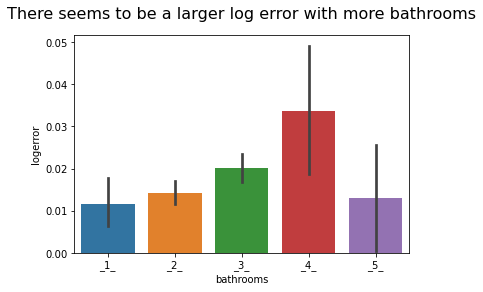

In [22]:
sns.barplot(x=train.bathrooms,
            y= train.logerror
           )
plt.title('There seems to be a larger log error with more bathrooms',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

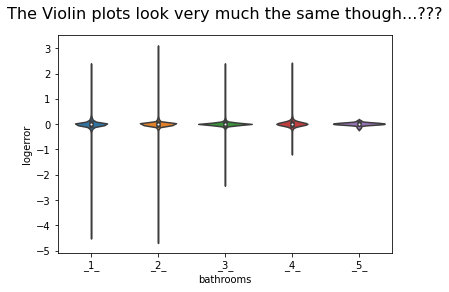

In [23]:
sns.violinplot(x=train.bathrooms,
            y= train.logerror
           )
plt.title('The Violin plots look very much the same though...???',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

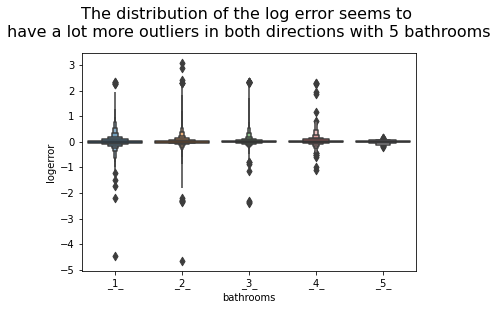

In [24]:
sns.boxenplot(x=train.bathrooms,
            y= train.logerror
           )
plt.title('The distribution of the log error seems \
to \nhave a lot more outliers in both directions with 5 bathrooms',
          fontdict={'fontsize': 16},
          y= 1.05
     )
plt.show()

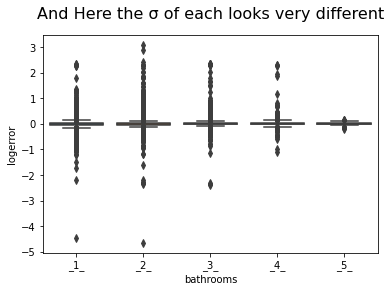

In [25]:
sns.boxplot(x=train.bathrooms,
            y= train.logerror
           )
plt.title('And Here the σ of each looks very different',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

<a id="STAT_TEST_1"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Statistical Tests:

In [26]:
# baths = 
train.bathrooms.sort_values().unique().tolist()

['_1_', '_2_', '_3_', '_4_', '_5_']

In [27]:
# baths = ['_1_', '_2_', '_3_', '_4_', '_5_']

In [28]:
# r, p_value = stats.levene(train.logerror[train.bathrooms == baths[0]],
#                           train.logerror[train.bathrooms == baths[1]]
#                          )
# α = .05

# if p_value > α: print('we CANNOT reject our null Hₒ: The varience is similar')
# else: print(f"We can REJECT the null {strike('Hₒ: The varience is similar')}\
# \nFor Bathrooms {baths[0]}, and {baths[1]}")

In [29]:
# baths = ['_1_', '_2_', '_3_', '_4_', '_5_']

# for i in range(0,5):

#     for j in range(i,5):
#         if i == j: continue


#         r, p_value = stats.levene(train.logerror[train.bathrooms == baths[i]],
#                                   train.logerror[train.bathrooms == baths[j]]
#                                  )
#         α = .05

#         print('-------------\n')

#         if p_value > α: 
#             print(f'we CANNOT reject our null Hₒ: The varience is similar\
#             \n  For Bathrooms ({baths[i]}, {baths[j]})')
#             var_equal = True

#         else: 
#             print(f"We can REJECT the null {strike('Hₒ: The varience is similar')}\
#             \n  For Bathrooms ({baths[i]}, {baths[j]})")
#             var_equal = False


#         t, p = stats.ttest_ind(train[train.bathrooms == baths[i]].logerror, 
#                 train[train.bathrooms == baths[j]].logerror,
#                equal_var=var_equal)

#         print('---\n')

#         if p > α:
#             print(f'We CANNOT reject our Null Hₒ: The means are similar\
#             \n  For Bathrooms ({baths[i]}, {baths[j]})')

#         else:
#             print(f"We can REJECT the Null {strike('Hₒ: The means are similar')}\
#             \n For Bathrooms ({baths[i]}, {baths[j]})")

In [30]:
def stats_for_ind_t_tests(train_, ind_var_, target_):
    '''
    Takes in a DataFrame, 
    which independent categorical variable groups you want to test,
    and the target variable for the test.
    
    Parameters:
    ---------------
    train_    : the DataFrame
    ind_var_  : the independent Categorical variable
    target_   : the dependent or target variable you are testing 
    
    Uses the scipy.stats.levene() test for equal variance, and uses the result
    
    When using scipy.stats.ttest_ind() to test the T-statistic and p-value
    
    α is set to .05
    
    Prints the Null Hypotheses and whether they are rejected or not
    '''

    ind_vars_ = train_[ind_var_].sort_values().unique().tolist() #= ['_1_', '_2_', '_3_', '_4_', '_5_']

    for i in range(0,len(ind_vars_)):

        for j in range(i,len(ind_vars_)):
            if i == j: continue


            r, p_value = stats.levene(train_[target_][train_[ind_var_] == ind_vars_[i]],
                                      train_[target_][train_[ind_var_] == ind_vars_[j]]
                                     )
            α = .05

            print('-------------\n')

            if p_value > α: 
                print(f'----> We CANNOT reject our null Hₒ: The varience is similar\
                \n  ----> For {ind_var_.capitalize()} ({ind_vars_[i]}, {ind_vars_[j]})')
                var_equal = True

            else: 
                print(f"We can REJECT the null {strike('Hₒ: The varience is similar')}\
                \n  For {ind_var_.capitalize()} ({ind_vars_[i]}, {ind_vars_[j]})")
                var_equal = False


            t, p = stats.ttest_ind(train_[target_][train_[ind_var_] == ind_vars_[i]], 
                    train_[target_][train_[ind_var_] == ind_vars_[j]],
                   equal_var=var_equal)

            print('---\n')

            if p > α:
                print(f'----> We CANNOT reject our Null Hₒ: The means are similar\
                \n  ----> For {ind_var_.capitalize()} ({ind_vars_[i]}, {ind_vars_[j]})')

            else:
                print(f"We can REJECT the Null {strike('Hₒ: The means are similar')}\
                \n For {ind_var_.capitalize()} ({ind_vars_[i]}, {ind_vars_[j]})")

In [31]:
stats_for_ind_t_tests(train, 'bathrooms', 'logerror')

-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bathrooms (_1_, _2_)
---

----> We CANNOT reject our Null Hₒ: The means are similar                
  ----> For Bathrooms (_1_, _2_)
-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bathrooms (_1_, _3_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For Bathrooms (_1_, _3_)
-------------

----> We CANNOT reject our null Hₒ: The varience is similar                
  ----> For Bathrooms (_1_, _4_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For Bathrooms (_1_, _4_)
-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bathrooms (_1_, _5_)
---

----> We CANNOT reject our Null Hₒ: The means are similar                
  ----> For Bathrooms (_1_, _5_)
--

In [32]:
# stats.ttest_ind(train[train.bathrooms == baths[i]].logerror, 
#                 train[train.bathrooms == baths[j]]..logerror,
#                equal_var=var_equal)

<a id="ANS_1"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Answers/More Questions:

### The varience between most of the different categories is different...
- Interstingly, the varience and means are similar between (4 and 5) baths and (3 and 5) baths, but not betweeen (3 and 4)

<a id="Q_2"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 2. Q2:
[__< TOP >__](#TOP)

### Since we already looked at bathrooms, let's look at bedrooms too!

<a id="PLOTS_2"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Plots:

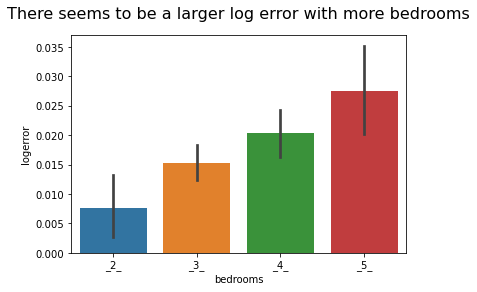

In [33]:
sns.barplot(x=train.bedrooms,
            y= train.logerror
           )
plt.title('There seems to be a larger log error with more bedrooms',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

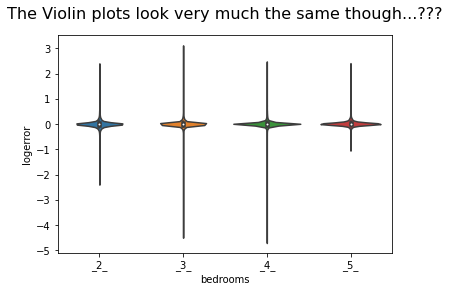

In [34]:
sns.violinplot(x=train.bedrooms,
            y= train.logerror
           )
plt.title('The Violin plots look very much the same though...???',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

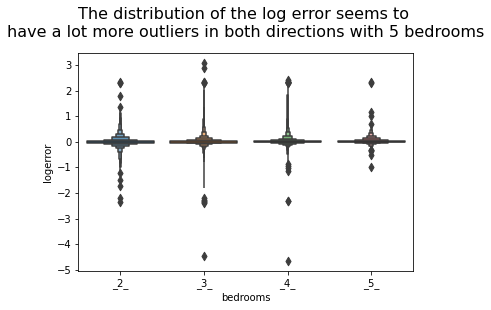

In [35]:
sns.boxenplot(x=train.bedrooms,
            y= train.logerror
           )
plt.title('The distribution of the log error seems \
to \nhave a lot more outliers in both directions with 5 bedrooms',
          fontdict={'fontsize': 16},
          y= 1.05
     )
plt.show()

In [ ]:
from scipy.stats import lo

In [67]:
train.logerror.describe()

count    23917.000000
mean         0.016017
std          0.165517
min         -4.655420
25%         -0.024295
50%          0.005599
75%          0.036134
max          3.069365
Name: logerror, dtype: float64

In [52]:
train['alog_error'] = np.exp(train.logerror + 5)

In [53]:
train.alog_error.describe()

count    23917.000000
mean       153.782910
std         59.121573
min          1.411396
25%        144.850860
50%        149.246401
75%        153.874040
max       3195.071848
Name: alog_error, dtype: float64

<AxesSubplot:>

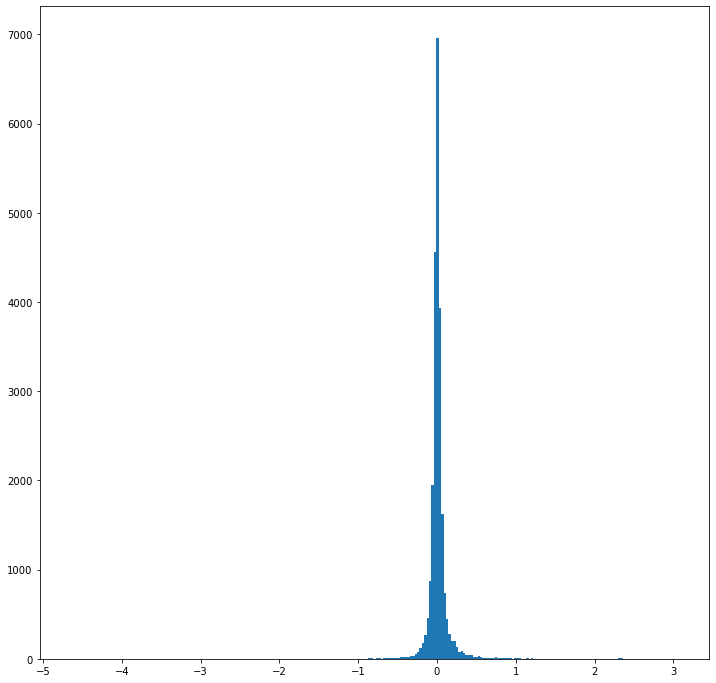

In [46]:
train.logerror.hist(grid= False, figsize=(12,12), bins= 251)

<AxesSubplot:>

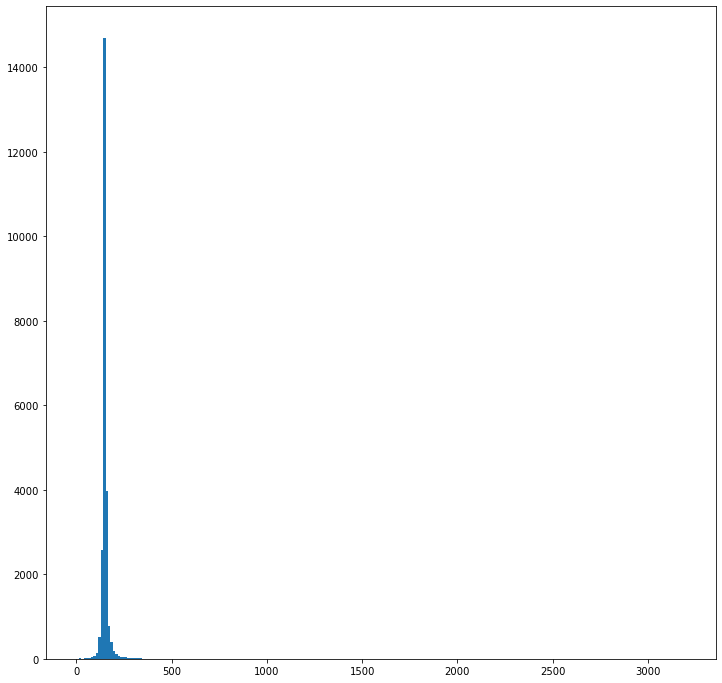

In [54]:
train.alog_error.hist(grid= False, figsize=(12,12), bins= 251)

In [78]:
train['alog_error'] = np.exp(train.logerror)

In [79]:
train.alog_error.describe()

count    23917.000000
mean         1.036181
std          0.398358
min          0.009510
25%          0.975997
50%          1.005614
75%          1.036795
max         21.528225
Name: alog_error, dtype: float64

<AxesSubplot:>

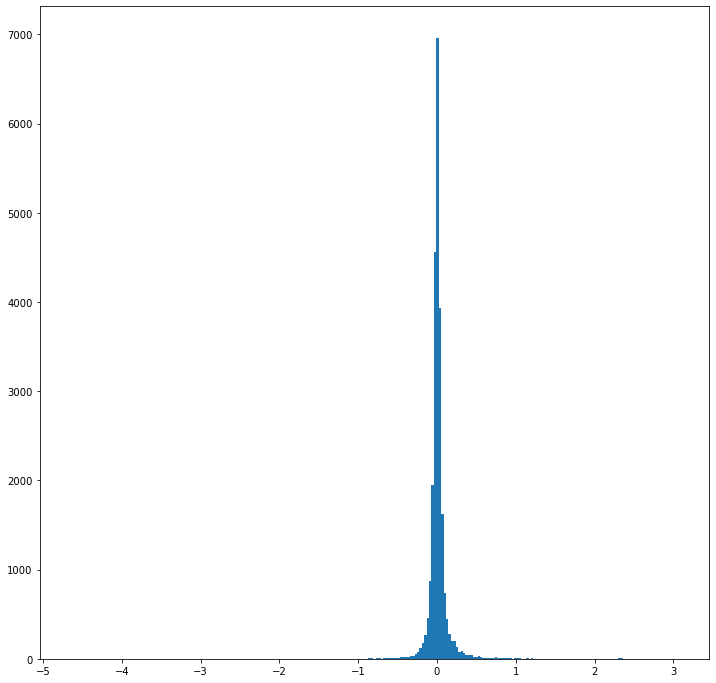

In [70]:
train.logerror.hist(grid= False, figsize=(12,12), bins= 251)

<AxesSubplot:>

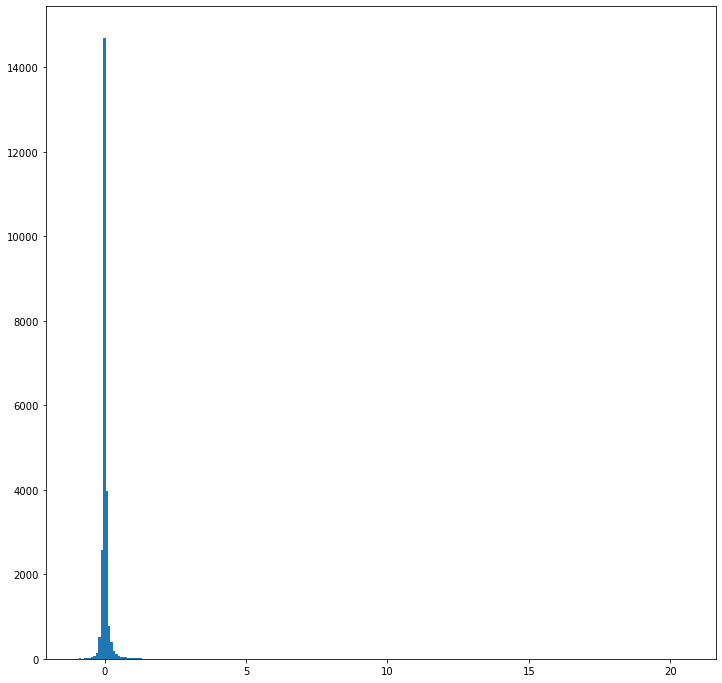

In [77]:
train.alog_error.hist(grid= False, figsize=(12,12), bins= 251)

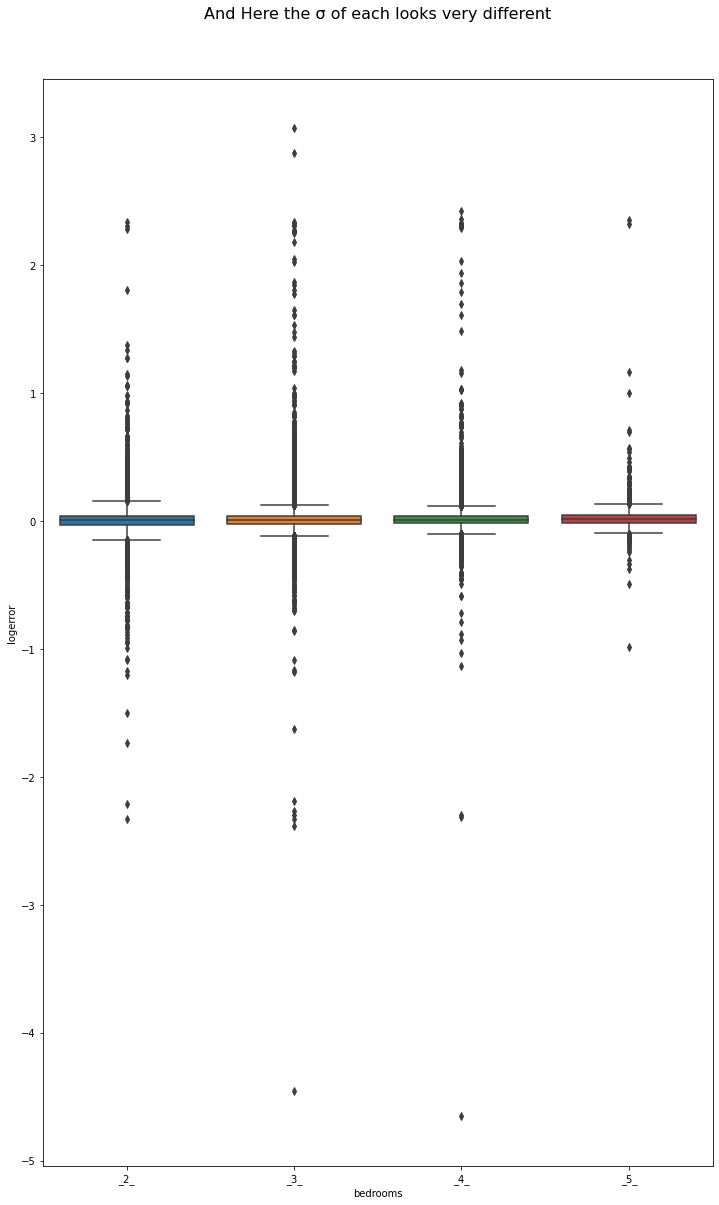

In [42]:
plt.figure(figsize=(12,20))
sns.boxplot(x=train.bedrooms,
            y= train.logerror
           )
plt.title('And Here the σ of each looks very different',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

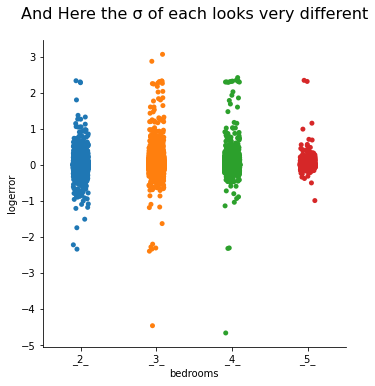

In [37]:
sns.catplot(data=train,
            x= 'bedrooms',
            y= 'logerror'
           )
plt.title('And Here the σ of each looks very different',
          fontdict={'fontsize': 16},
          y= 1.05
         )
plt.show()

<a id="STAT_TEST_2"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Statistical Tests:

In [38]:
stats_for_ind_t_tests(train, 'bedrooms', 'logerror')

-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bedrooms (_2_, _3_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For Bedrooms (_2_, _3_)
-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bedrooms (_2_, _4_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For Bedrooms (_2_, _4_)
-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bedrooms (_2_, _5_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For Bedrooms (_2_, _5_)
-------------

We can REJECT the null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶v̶a̶r̶i̶e̶n̶c̶e̶ ̶i̶s̶ ̶s̶i̶m̶i̶l̶a̶r̶                
  For Bedrooms (_3_, _4_)
---

We can REJECT the Null H̶ₒ̶:̶ ̶T̶h̶e̶ ̶m̶e̶a̶n̶s̶ ̶a̶r̶e̶ ̶s̶i̶m̶i̶l̶a̶r̶                
 For 

<a id="ANS_2"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Answers/More Questions:

### Looks like I can maybe put 2 and 3 bedrooms into one category and look at 4 and 5 separately

<a id="Q_3"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 3. Q3:
[__< TOP >__](#TOP)

<a id="PLOTS_3"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Plots:

<a id="STAT_TEST_3"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Statistical Tests:

<a id="ANS_3"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Answers/More Questions:

<a id="Q_4"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 4. Q4:
[__< TOP >__](#TOP)

<a id="PLOTS_4"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Plots:

<a id="STAT_TEST_4"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Statistical Tests:

<a id="ANS_4"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Answers/More Questions:

<a id="Q_5"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 5. Q5:
[__< TOP >__](#TOP)

<a id="PLOTS_5"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Plots:

<a id="STAT_TEST_5"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Statistical Tests:

<a id="ANS_5"> </a>
<div class="alert alert-block alert-info">
</div>

***
#### - Answers/More Questions:

## 2. Answer those questions through a mix of statistical tests and visualizations.

[__< TOP >__](#TOP)

# Bonus:

- **Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.**